### Regression
* 클래스의 값이 연속형 수치값일 때  
예) 주택가격 예측, 매출액 예측

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [5]:
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV',1), df['MEDV'], random_state=32)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

### 평가지표
#### MSE (Mean Squared Error)
* 오차제곱평균
* 실제값과 예측값의 차이를 제곱한 평균

#### MAE (Mean Absolute Error)
* 오차 절대값 평균
* 실제값과 예측값의 차이의 절대값 평균

#### RMSE (Root Mean Squared Error)
* MSE의 제곱근

In [8]:
real = np.array([1,2,3])
pred = np.array([3,4,5])
(real == pred).mean()

0.0

In [9]:
((real-pred)**2).sum()/3

4.0

In [10]:
# mse
# 실제값과 예측값을 매개변수로 입력받아 mse 값을 리턴
def mse(real, pred):
    return ((real-pred)**2).mean()

In [11]:
mse(real, pred)

4.0

In [12]:
# mae
def mae(real, pred):
    return np.abs(real-pred).mean()

In [13]:
mae(real, pred)

2.0

In [14]:
# rmse
def rmse(real, pred):
    return np.sqrt(mse(real,pred))

In [15]:
rmse(real, pred)

2.0

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
mse(real,pred), mean_squared_error(real,pred)

(4.0, 4.0)

In [18]:
mae(real,pred), mean_absolute_error(real,pred)

(2.0, 2.0)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

### LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression # import
model = LinearRegression() # 객체 생성
model.fit(x_train, y_train) # 학습
pred = model.predict(x_test) # 예측

In [21]:
mse(pred, y_test)

26.09898668454896

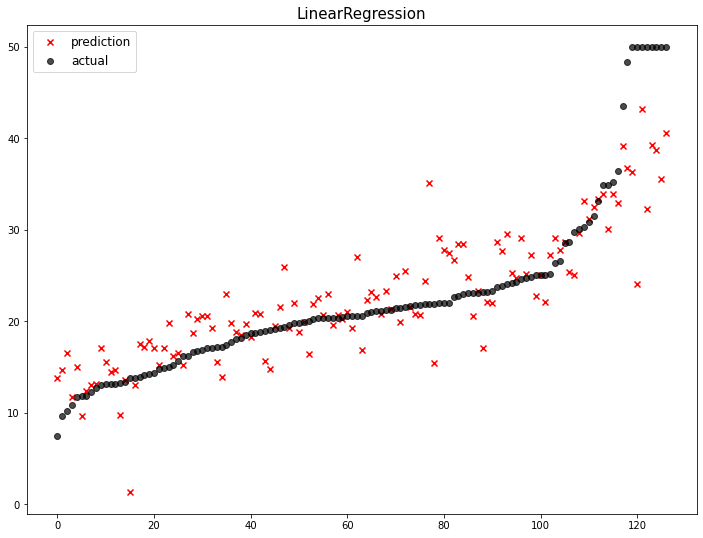

              model        mse
0  LinearRegression  26.098987


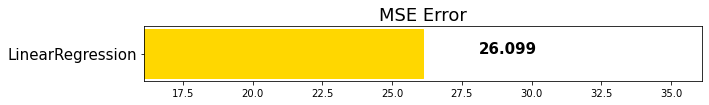

In [22]:
mse_eval('LinearRegression', pred, y_test)

### Regularization (규제)
학습의 과적합을 방지하고자 페널티 부여

* L1 규제
    * 가중치의 합을 규제강도 곱함
    * 가중치가 0이 되는 경우 발생, 모델 학습에서 제외되는 특성
    
* L2 규제 (더 많이 사용, 안정적)
    * 각 가중치 제곱의 합으로 규제강도 곱합
    * 규제강도가 크면, 가중치 감소, 규제강도 작아지면 가중치 증가
    
* L1 규제 : Lasso = MSE + a|w|
* L2 규제 : Ridge = MSE + aw2(제곱)

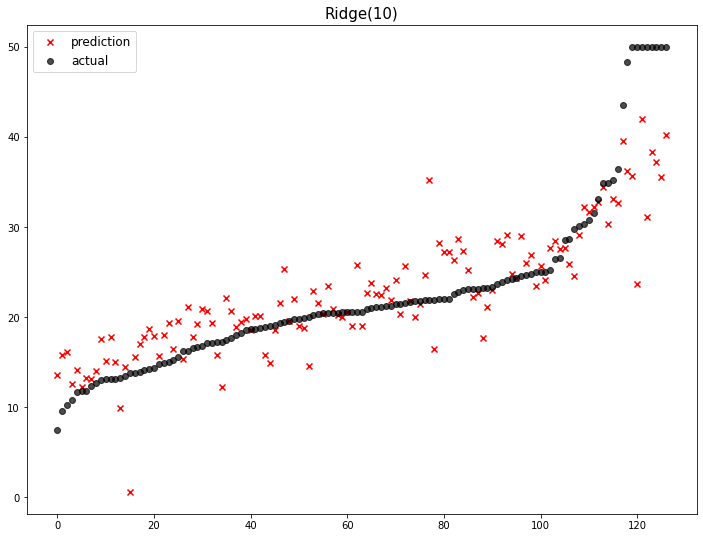

              model        mse
0         Ridge(10)  27.503376
1  LinearRegression  26.098987


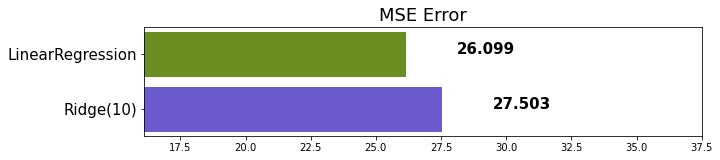

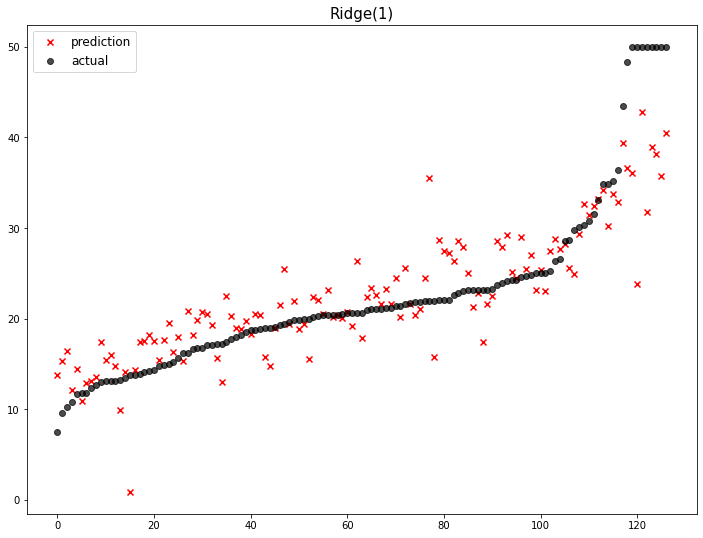

              model        mse
0         Ridge(10)  27.503376
1          Ridge(1)  26.438830
2  LinearRegression  26.098987


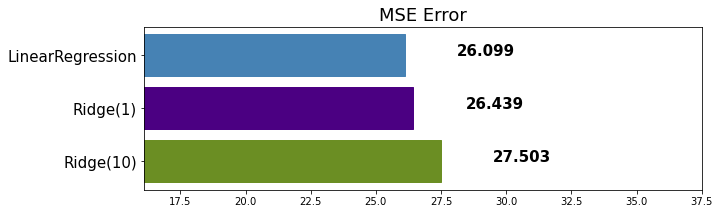

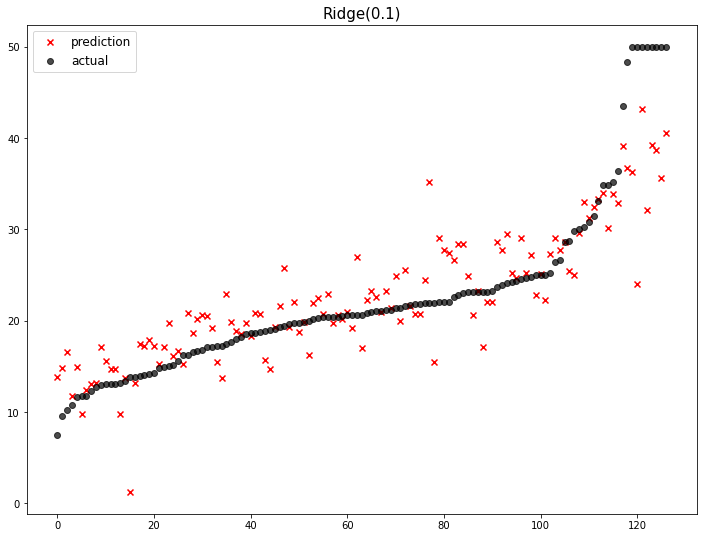

              model        mse
0         Ridge(10)  27.503376
1          Ridge(1)  26.438830
2        Ridge(0.1)  26.125895
3  LinearRegression  26.098987


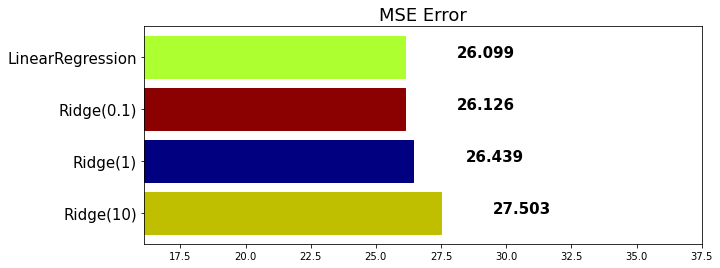

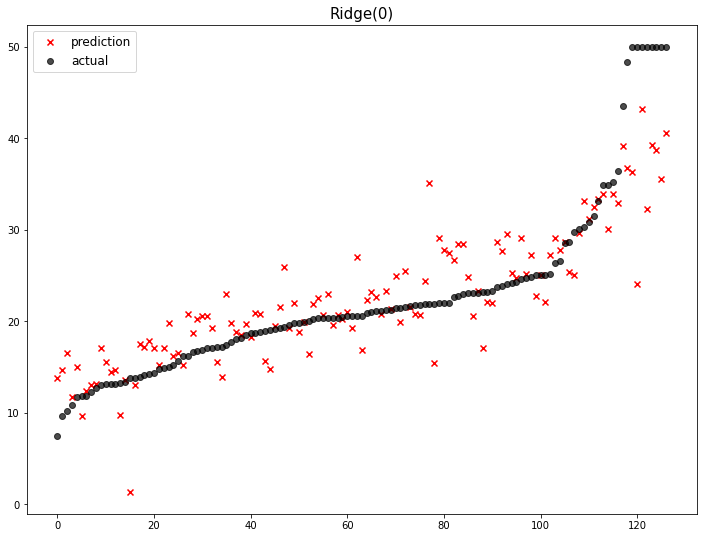

              model        mse
0         Ridge(10)  27.503376
1          Ridge(1)  26.438830
2        Ridge(0.1)  26.125895
3  LinearRegression  26.098987
4          Ridge(0)  26.098987


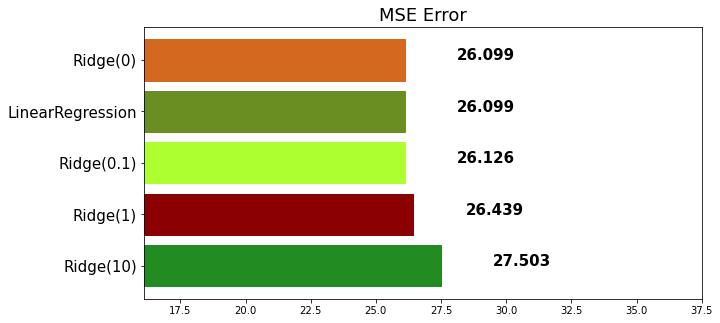

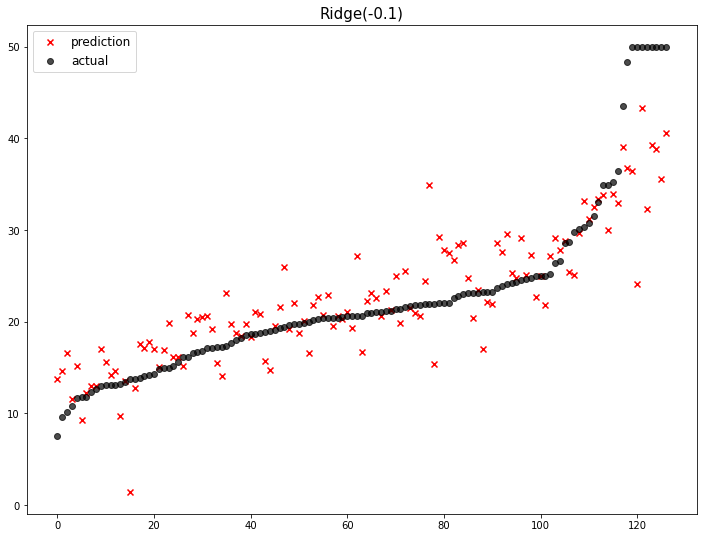

              model        mse
0         Ridge(10)  27.503376
1          Ridge(1)  26.438830
2        Ridge(0.1)  26.125895
3  LinearRegression  26.098987
4          Ridge(0)  26.098987
5       Ridge(-0.1)  26.082396


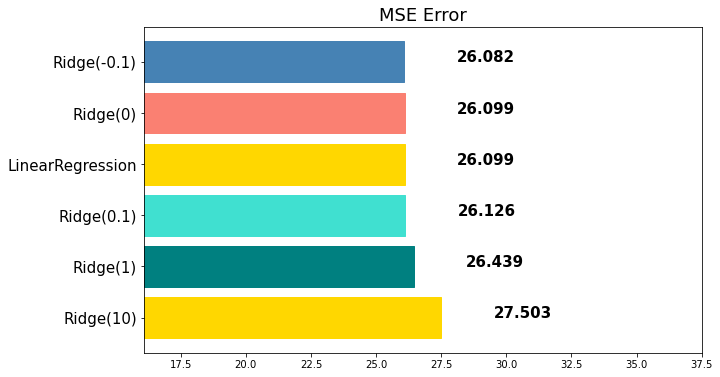

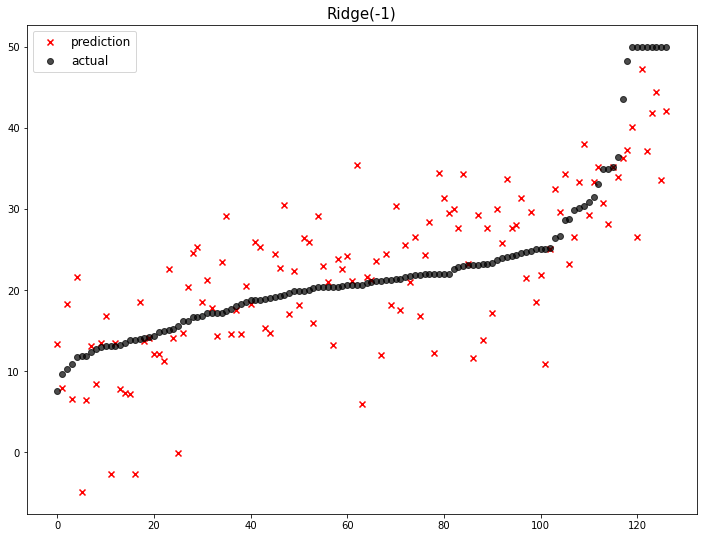

              model        mse
0         Ridge(-1)  50.040791
1         Ridge(10)  27.503376
2          Ridge(1)  26.438830
3        Ridge(0.1)  26.125895
4  LinearRegression  26.098987
5          Ridge(0)  26.098987
6       Ridge(-0.1)  26.082396


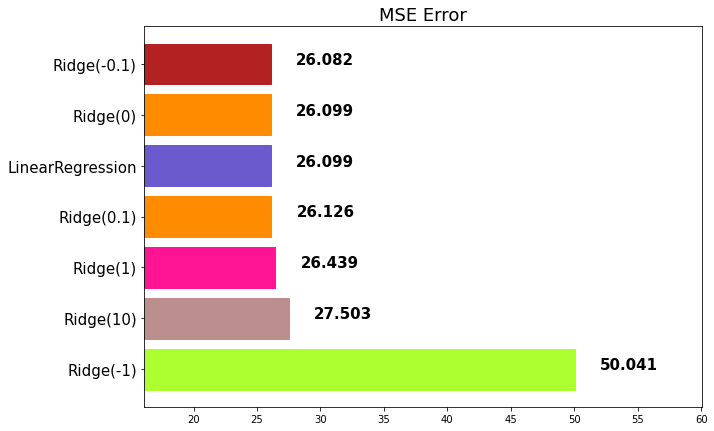

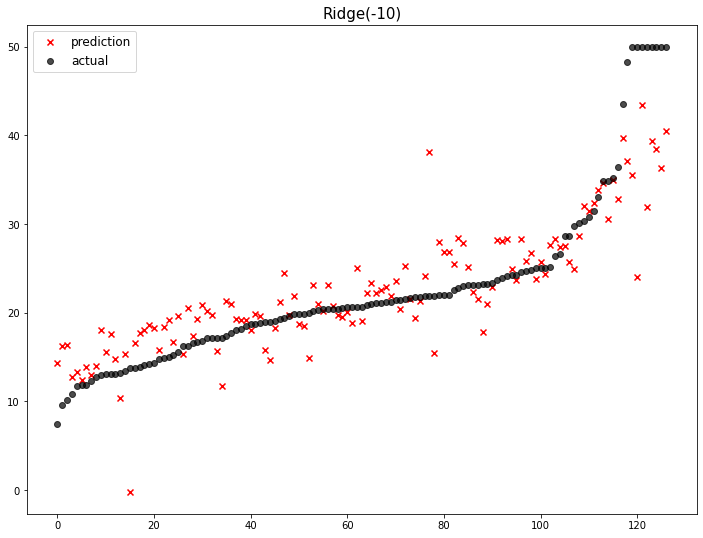

              model        mse
0         Ridge(-1)  50.040791
1         Ridge(10)  27.503376
2        Ridge(-10)  26.740851
3          Ridge(1)  26.438830
4        Ridge(0.1)  26.125895
5  LinearRegression  26.098987
6          Ridge(0)  26.098987
7       Ridge(-0.1)  26.082396


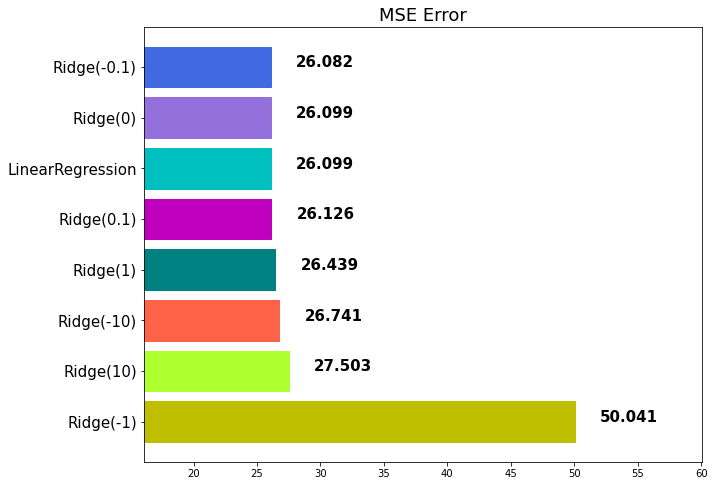

In [23]:
from sklearn.linear_model import Ridge
alpha = [10, 1, 0.1, 0, -0.1, -1, -10]
for a in alpha:
    model = Ridge(alpha=a)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mse_eval('Ridge({})'.format(a), pred, y_test)

In [24]:
model.coef_

array([-0.10176298,  0.04516597, -0.06123755,  1.8358321 ,  2.42061992,
        4.28403733, -0.02135539, -1.08020046,  0.22064533, -0.01336357,
       -0.72413701,  0.00784336, -0.48261827])

In [25]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

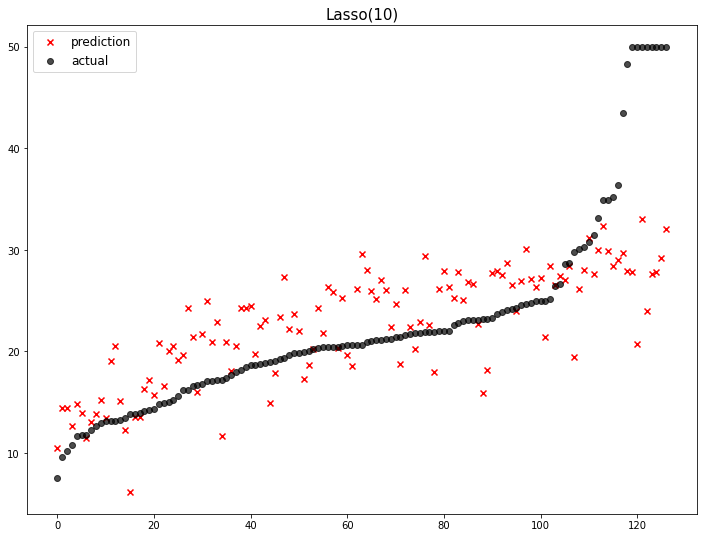

              model        mse
0         Lasso(10)  52.757515
1         Ridge(-1)  50.040791
2         Ridge(10)  27.503376
3        Ridge(-10)  26.740851
4          Ridge(1)  26.438830
5        Ridge(0.1)  26.125895
6  LinearRegression  26.098987
7          Ridge(0)  26.098987
8       Ridge(-0.1)  26.082396


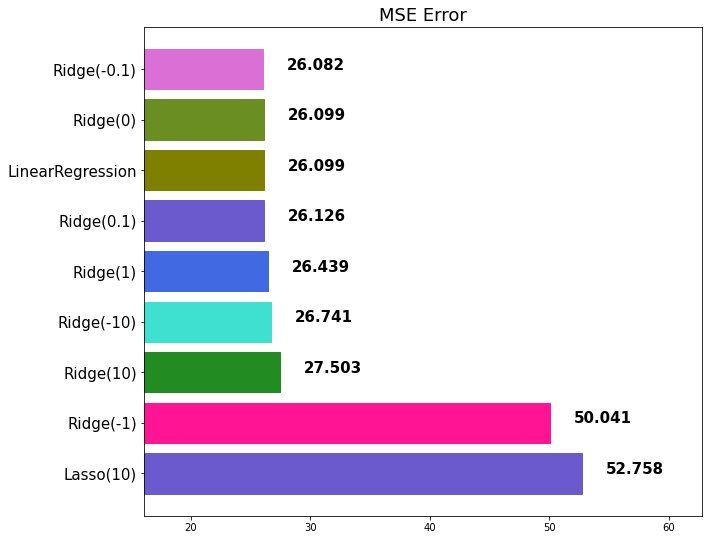

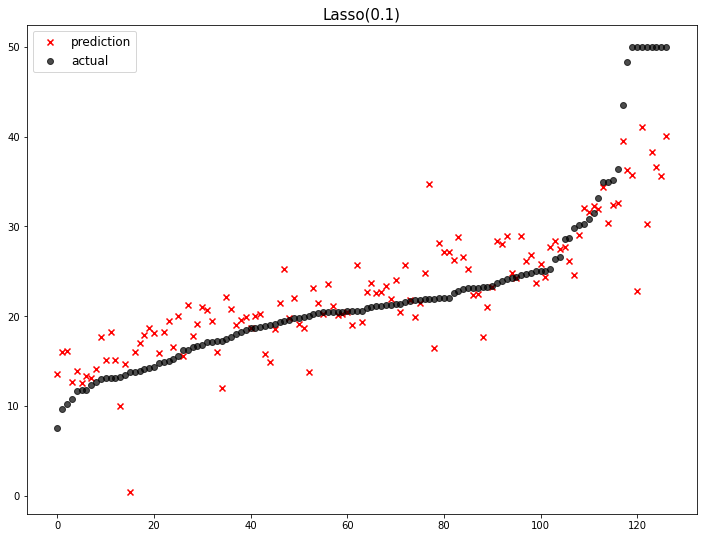

              model        mse
0         Lasso(10)  52.757515
1         Ridge(-1)  50.040791
2        Lasso(0.1)  28.459592
3         Ridge(10)  27.503376
4        Ridge(-10)  26.740851
5          Ridge(1)  26.438830
6        Ridge(0.1)  26.125895
7  LinearRegression  26.098987
8          Ridge(0)  26.098987
9       Ridge(-0.1)  26.082396


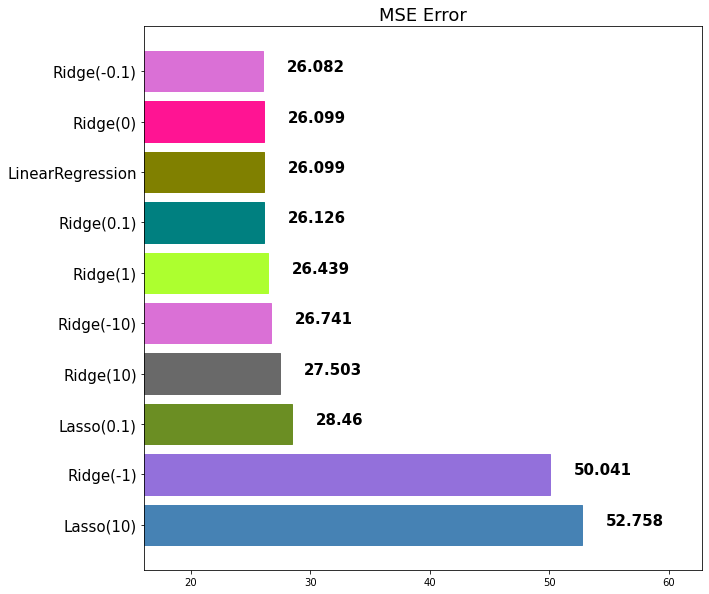

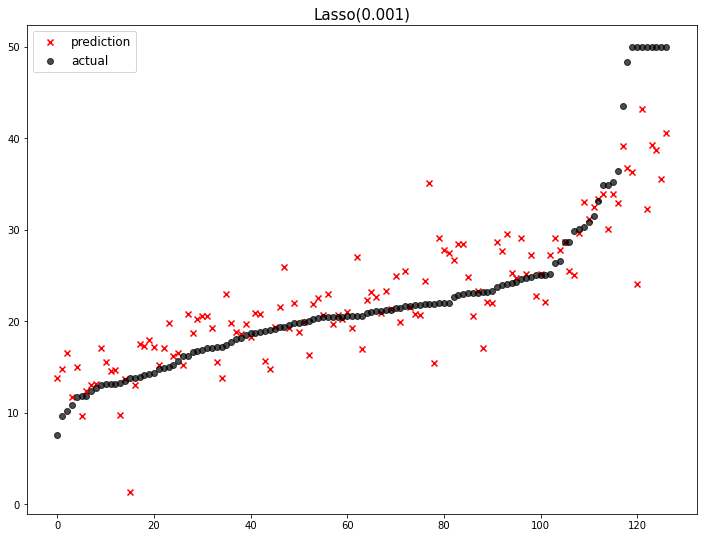

               model        mse
0          Lasso(10)  52.757515
1          Ridge(-1)  50.040791
2         Lasso(0.1)  28.459592
3          Ridge(10)  27.503376
4         Ridge(-10)  26.740851
5           Ridge(1)  26.438830
6         Ridge(0.1)  26.125895
7       Lasso(0.001)  26.117271
8   LinearRegression  26.098987
9           Ridge(0)  26.098987
10       Ridge(-0.1)  26.082396


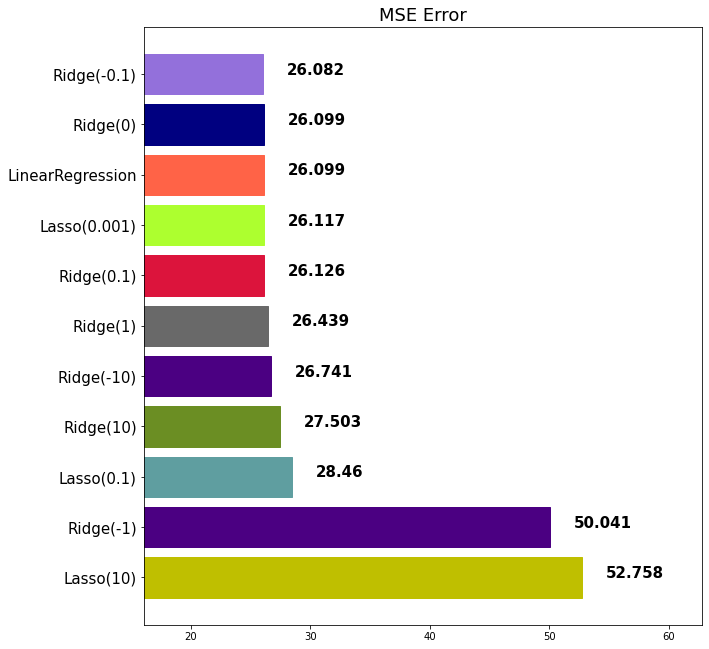

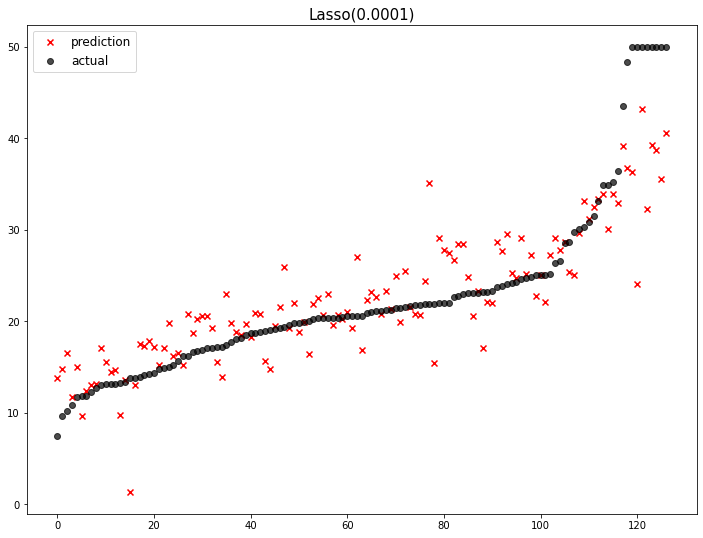

               model        mse
0          Lasso(10)  52.757515
1          Ridge(-1)  50.040791
2         Lasso(0.1)  28.459592
3          Ridge(10)  27.503376
4         Ridge(-10)  26.740851
5           Ridge(1)  26.438830
6         Ridge(0.1)  26.125895
7       Lasso(0.001)  26.117271
8      Lasso(0.0001)  26.100782
9   LinearRegression  26.098987
10          Ridge(0)  26.098987
11       Ridge(-0.1)  26.082396


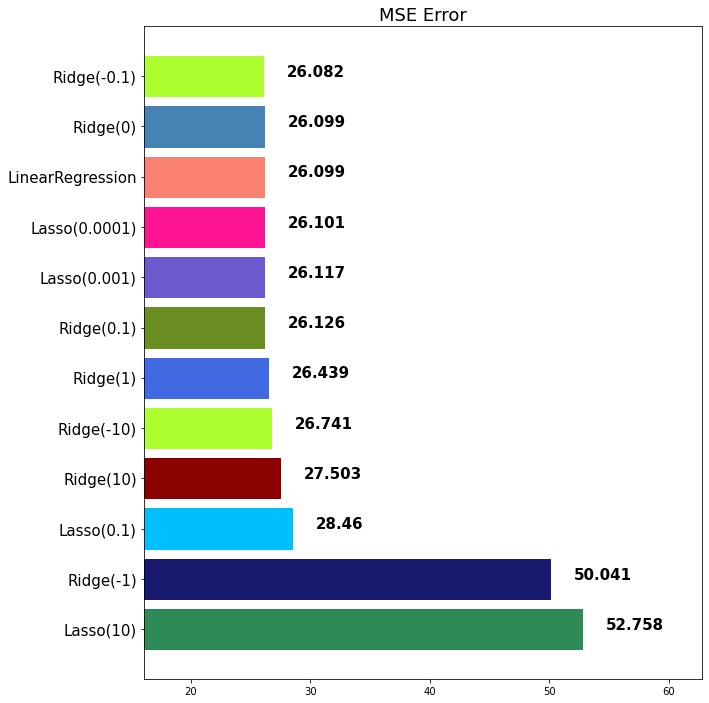

In [26]:
from sklearn.linear_model import Lasso
alpha = [10, 0.1, 0.001, 0.0001]
for a in alpha:
    model = Lasso(alpha=a)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mse_eval('Lasso({})'.format(a), pred, y_test)

In [27]:
remove_model('Lasso(-10)')
remove_model('Lasso(-1)')

False

### ElasticNet
l1_ratio (기본값 0.5) -> l1:0.5, l2:0.5  
예) l1_ratio=0 -> L2규제만 사용

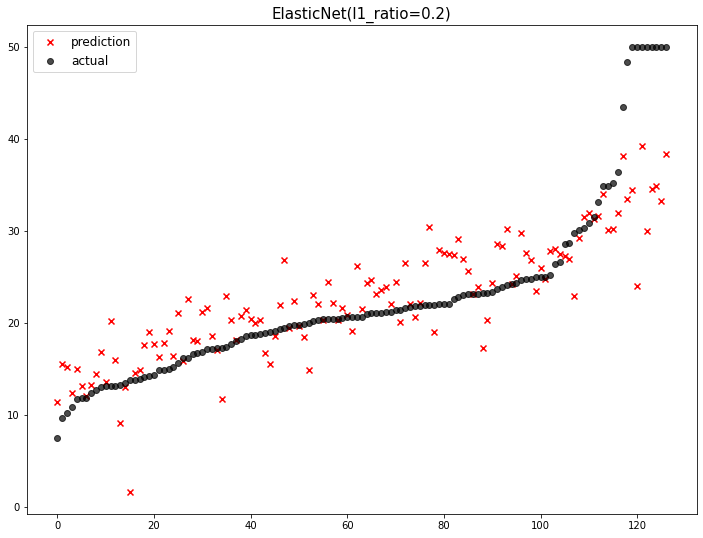

                       model        mse
0                  Lasso(10)  52.757515
1                  Ridge(-1)  50.040791
2   ElasticNet(l1_ratio=0.2)  31.685713
3                 Lasso(0.1)  28.459592
4                  Ridge(10)  27.503376
5                 Ridge(-10)  26.740851
6                   Ridge(1)  26.438830
7                 Ridge(0.1)  26.125895
8               Lasso(0.001)  26.117271
9              Lasso(0.0001)  26.100782
10          LinearRegression  26.098987
11                  Ridge(0)  26.098987
12               Ridge(-0.1)  26.082396


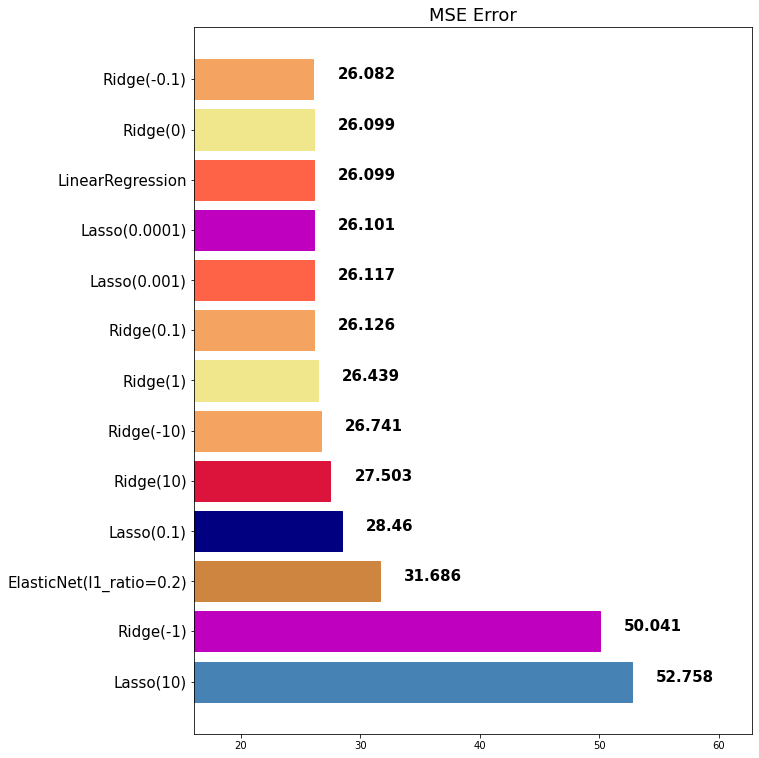

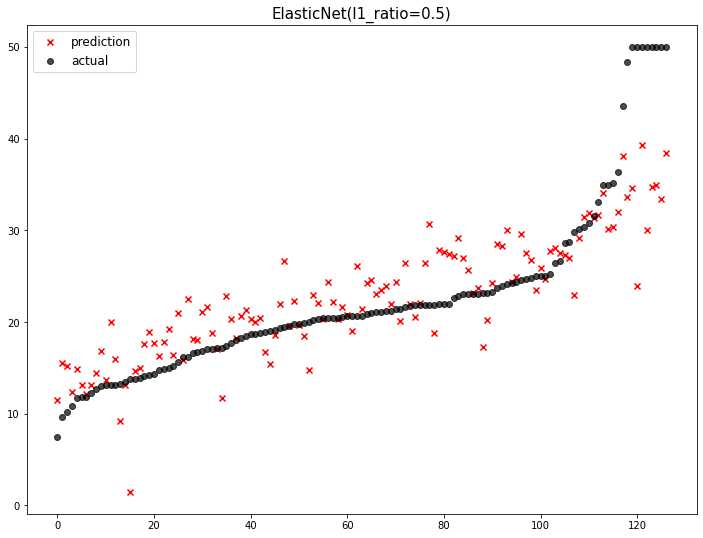

                       model        mse
0                  Lasso(10)  52.757515
1                  Ridge(-1)  50.040791
2   ElasticNet(l1_ratio=0.2)  31.685713
3   ElasticNet(l1_ratio=0.5)  31.491853
4                 Lasso(0.1)  28.459592
5                  Ridge(10)  27.503376
6                 Ridge(-10)  26.740851
7                   Ridge(1)  26.438830
8                 Ridge(0.1)  26.125895
9               Lasso(0.001)  26.117271
10             Lasso(0.0001)  26.100782
11          LinearRegression  26.098987
12                  Ridge(0)  26.098987
13               Ridge(-0.1)  26.082396


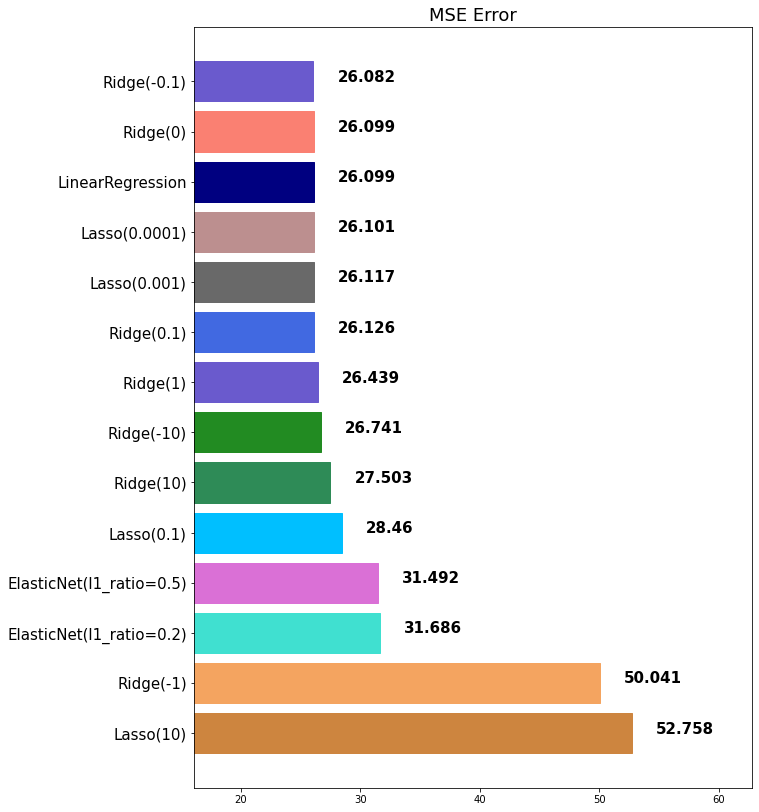

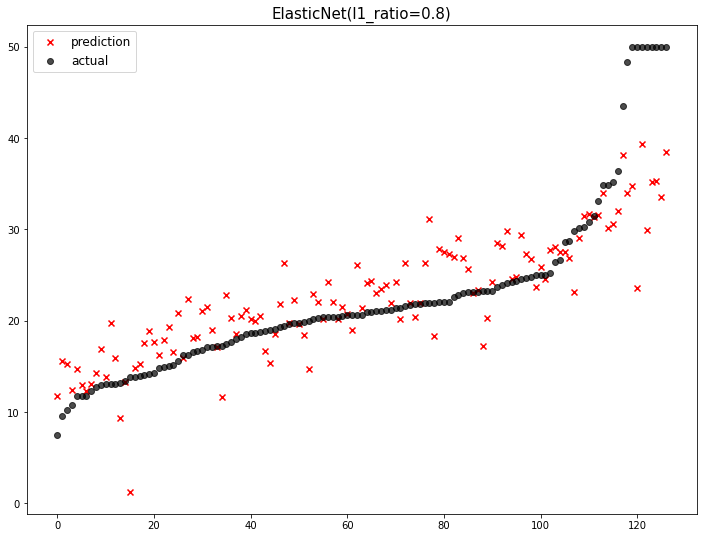

                       model        mse
0                  Lasso(10)  52.757515
1                  Ridge(-1)  50.040791
2   ElasticNet(l1_ratio=0.2)  31.685713
3   ElasticNet(l1_ratio=0.5)  31.491853
4   ElasticNet(l1_ratio=0.8)  31.107436
5                 Lasso(0.1)  28.459592
6                  Ridge(10)  27.503376
7                 Ridge(-10)  26.740851
8                   Ridge(1)  26.438830
9                 Ridge(0.1)  26.125895
10              Lasso(0.001)  26.117271
11             Lasso(0.0001)  26.100782
12          LinearRegression  26.098987
13                  Ridge(0)  26.098987
14               Ridge(-0.1)  26.082396


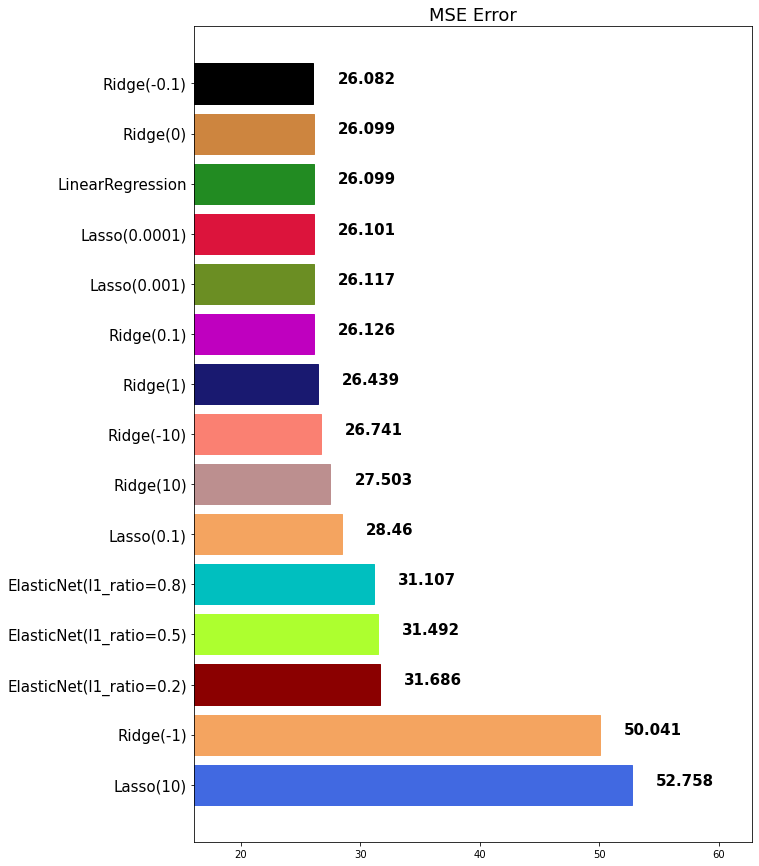

In [28]:
from sklearn.linear_model import ElasticNet
ratio = [0.2,0.5,0.8]
for r in ratio:
    model = ElasticNet(alpha=0.5, l1_ratio=r)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(r), pred, y_test)

In [29]:
# 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [30]:
# standard scaler
# 평균:0, 표준편차:1
stdScaler = StandardScaler()
pd.DataFrame(stdScaler.fit_transform(x_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.405252,0.414723,-0.611650,3.684688,-0.790149,-0.508432,-0.271654,0.085890,-0.743960,-1.076636,0.077442,0.375231,0.124266
1,-0.387200,-0.483961,-0.380434,-0.271393,-0.305489,-0.073170,0.774900,-0.565277,-0.511702,-0.124862,1.130587,0.374012,0.385953
2,-0.258561,-0.483961,1.212063,-0.271393,2.732293,-1.235277,1.084990,-1.017688,-0.511702,-0.012541,-1.708325,-0.175733,0.073306
3,0.544010,-0.483961,0.998189,-0.271393,1.252348,-1.049340,1.084990,-1.023002,1.694745,1.542220,0.810065,0.436818,1.494681
4,-0.407964,2.661433,-1.293736,-0.271393,-1.344046,0.090229,-1.730487,1.941225,-0.511702,-0.278564,-1.662536,0.119355,-1.071231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,8.870497,-0.483961,0.998189,-0.271393,1.001363,0.967796,0.799566,-1.100768,1.694745,1.542220,0.810065,0.436818,0.614585
375,-0.139683,-0.483961,-0.186791,-0.271393,-0.097777,-1.842390,-1.106783,-0.577471,-0.627831,-0.597793,-0.014135,-0.077703,-0.014841
376,0.435972,-0.483961,0.998189,-0.271393,1.252348,-1.254997,1.046229,-0.952922,1.694745,1.542220,0.810065,0.436818,1.115923
377,-0.398081,-0.483961,-0.618875,-0.271393,-0.928623,-0.098525,-2.209717,0.941556,-0.743960,-1.017519,-0.243080,0.409790,-0.731038


### 파이프라인

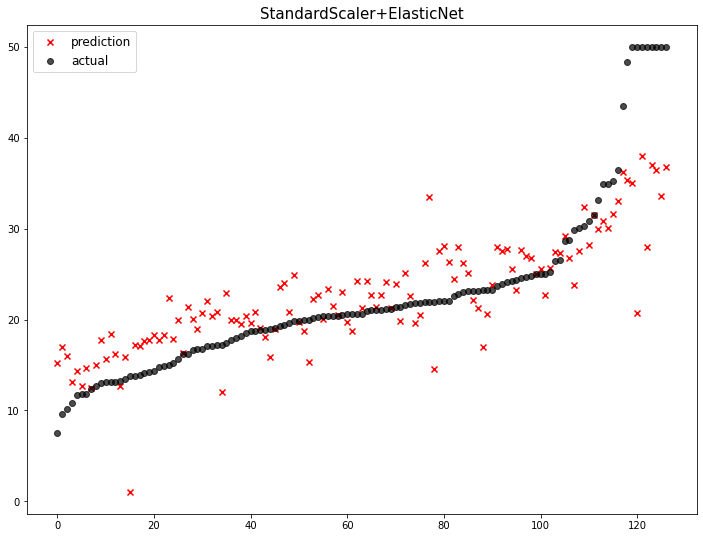

                        model        mse
0                   Lasso(10)  52.757515
1                   Ridge(-1)  50.040791
2   StandardScaler+ElasticNet  33.718148
3    ElasticNet(l1_ratio=0.2)  31.685713
4    ElasticNet(l1_ratio=0.5)  31.491853
5    ElasticNet(l1_ratio=0.8)  31.107436
6                  Lasso(0.1)  28.459592
7                   Ridge(10)  27.503376
8                  Ridge(-10)  26.740851
9                    Ridge(1)  26.438830
10                 Ridge(0.1)  26.125895
11               Lasso(0.001)  26.117271
12              Lasso(0.0001)  26.100782
13           LinearRegression  26.098987
14                   Ridge(0)  26.098987
15                Ridge(-0.1)  26.082396


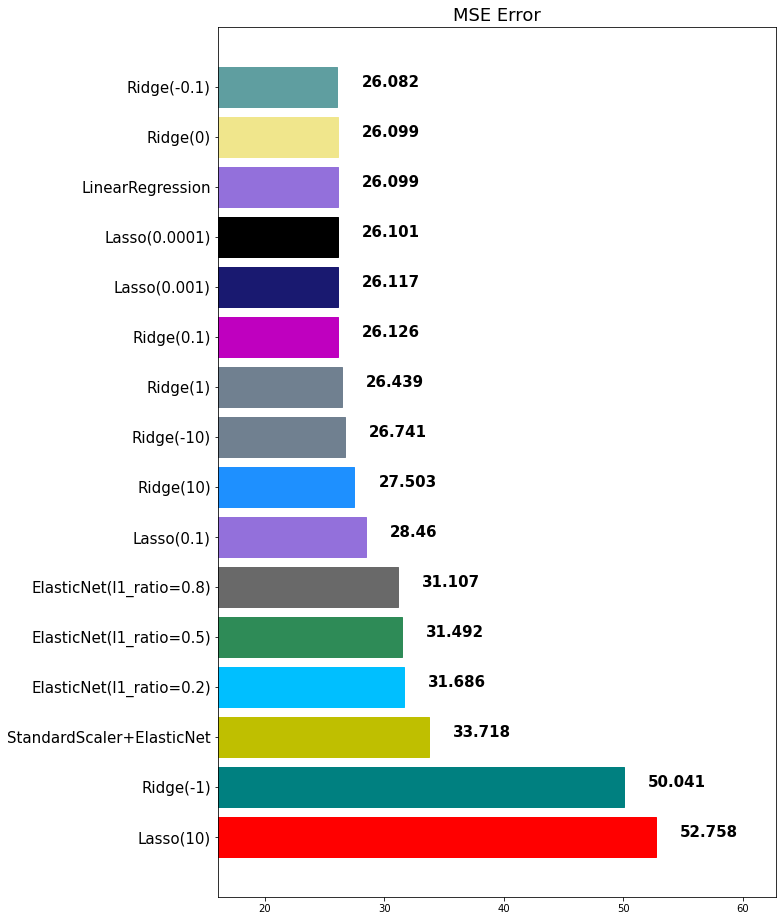

In [31]:
from sklearn.pipeline import make_pipeline
# StandardScaler + ElasticNet
elasticPipeline = make_pipeline(
    StandardScaler(), 
    ElasticNet(alpha=0.5, l1_ratio=0.8)
)
elasticPipeline.fit(x_train, y_train)
pred = elasticPipeline.predict(x_test)
mse_eval('StandardScaler+ElasticNet', pred, y_test)

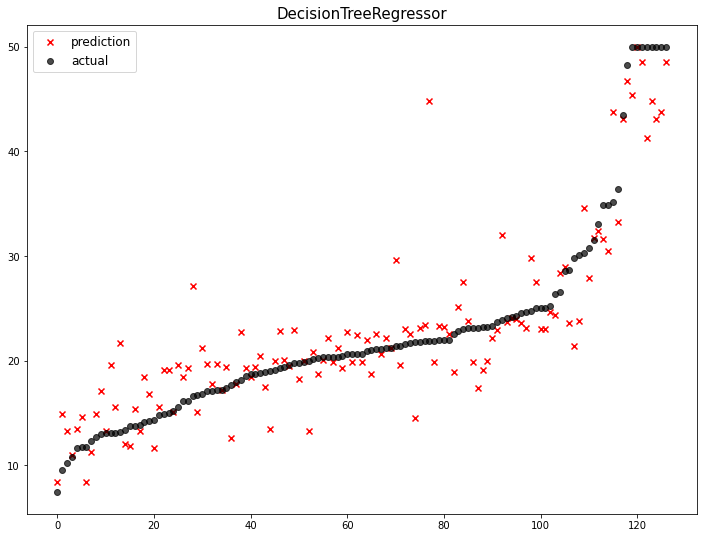

                        model        mse
0                   Lasso(10)  52.757515
1                   Ridge(-1)  50.040791
2   StandardScaler+ElasticNet  33.718148
3    ElasticNet(l1_ratio=0.2)  31.685713
4    ElasticNet(l1_ratio=0.5)  31.491853
5    ElasticNet(l1_ratio=0.8)  31.107436
6                  Lasso(0.1)  28.459592
7                   Ridge(10)  27.503376
8                  Ridge(-10)  26.740851
9                    Ridge(1)  26.438830
10                 Ridge(0.1)  26.125895
11               Lasso(0.001)  26.117271
12              Lasso(0.0001)  26.100782
13           LinearRegression  26.098987
14                   Ridge(0)  26.098987
15                Ridge(-0.1)  26.082396
16      DecisionTreeRegressor  15.949606


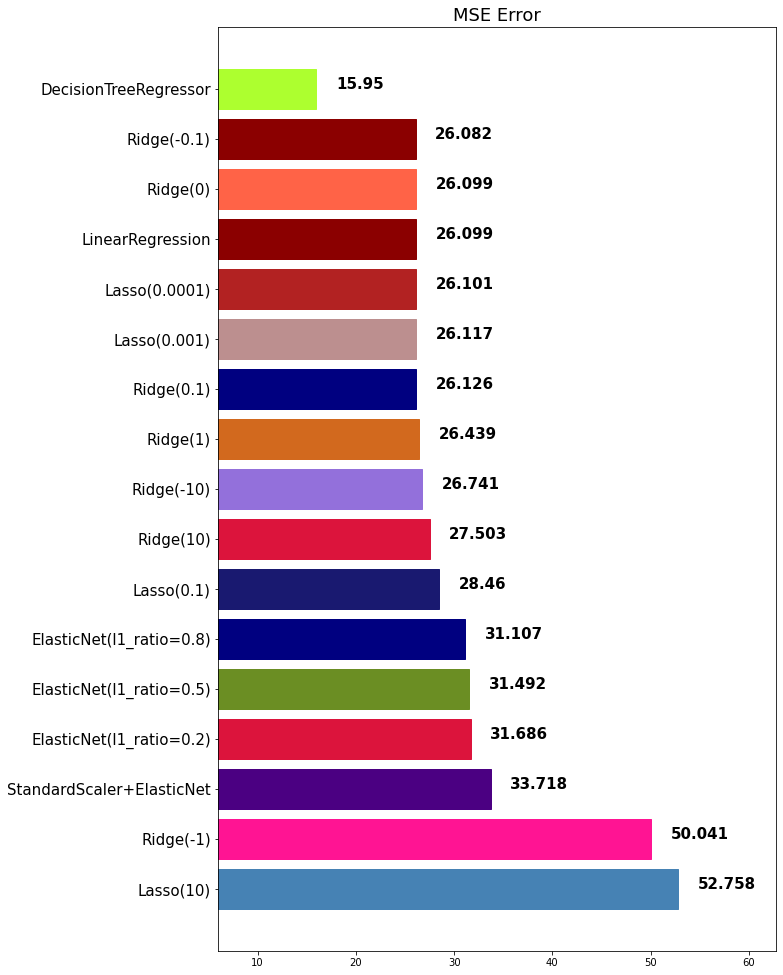

In [32]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)
mse_eval('DecisionTreeRegressor', pred, y_test)

### Polynomial Features
* 다항식의 계수간 상호작용을 통해 새로운 피쳐들을 생성  
예) 피쳐 a,b -> degree=2설정했다면 1,a,b,a^2,b^2,ab

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
features = poly.fit_transform(x_train)
features

array([[1.00000000e+00, 9.06500000e-02, 2.00000000e+01, ...,
        1.53146996e+05, 5.34179100e+03, 1.86322500e+02],
       [1.00000000e+00, 2.63630000e-01, 0.00000000e+00, ...,
        1.53060913e+05, 6.08362650e+03, 2.41802500e+02],
       [1.00000000e+00, 1.49632000e+00, 0.00000000e+00, ...,
        1.16690560e+05, 4.53644800e+03, 1.76358400e+02],
       ...,
       [1.00000000e+00, 8.15174000e+00, 0.00000000e+00, ...,
        1.57529610e+05, 8.27536500e+03, 4.34722500e+02],
       [1.00000000e+00, 1.59360000e-01, 0.00000000e+00, ...,
        1.55598692e+05, 2.93478240e+03, 5.53536000e+01],
       [1.00000000e+00, 1.98020000e-01, 0.00000000e+00, ...,
        1.54944577e+05, 3.72767610e+03, 8.96809000e+01]])

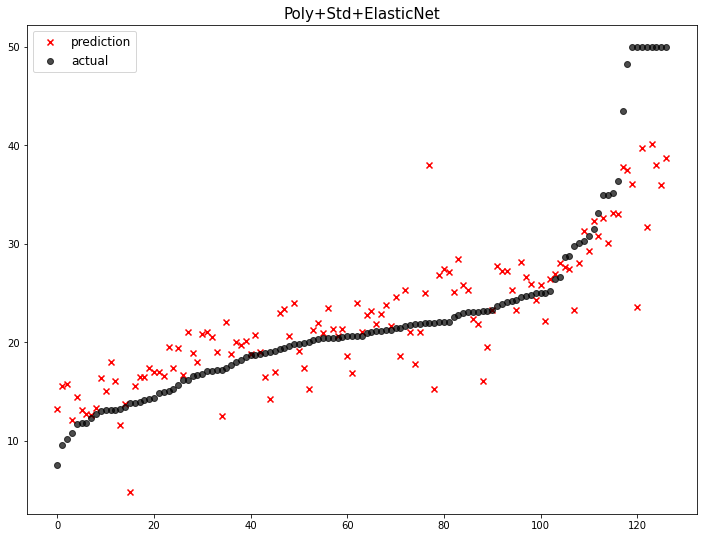

                        model        mse
0                   Lasso(10)  52.757515
1                   Ridge(-1)  50.040791
2   StandardScaler+ElasticNet  33.718148
3    ElasticNet(l1_ratio=0.2)  31.685713
4    ElasticNet(l1_ratio=0.5)  31.491853
5    ElasticNet(l1_ratio=0.8)  31.107436
6                  Lasso(0.1)  28.459592
7                   Ridge(10)  27.503376
8         Poly+Std+ElasticNet  26.832182
9                  Ridge(-10)  26.740851
10                   Ridge(1)  26.438830
11                 Ridge(0.1)  26.125895
12               Lasso(0.001)  26.117271
13              Lasso(0.0001)  26.100782
14           LinearRegression  26.098987
15                   Ridge(0)  26.098987
16                Ridge(-0.1)  26.082396
17      DecisionTreeRegressor  15.949606


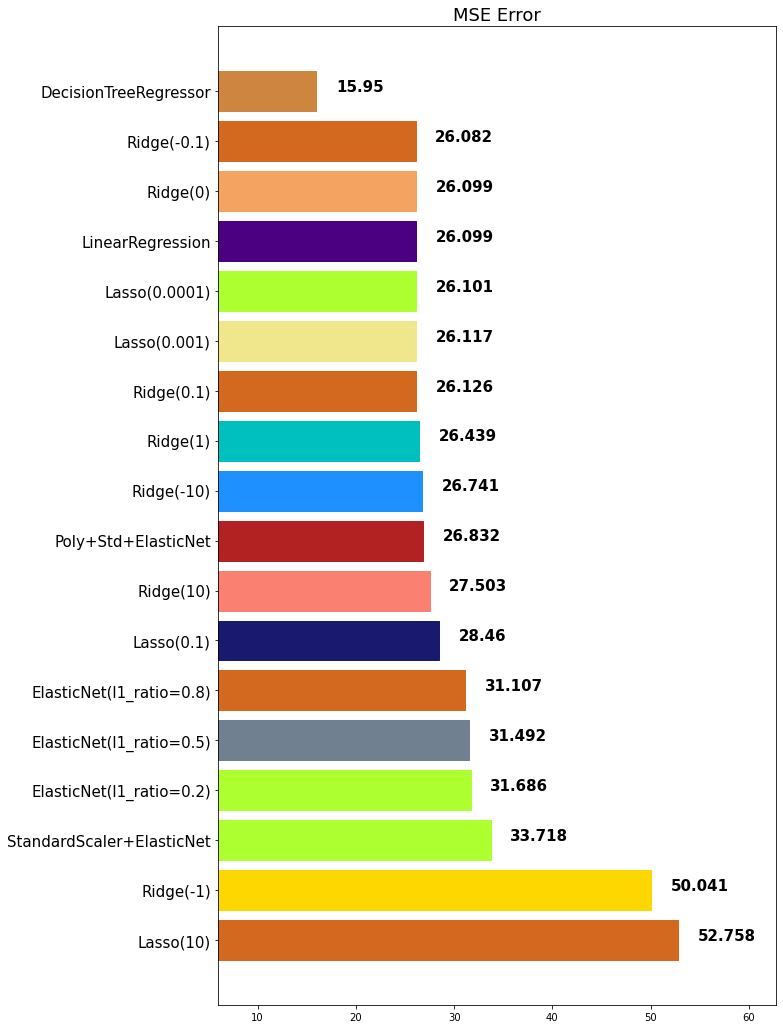

In [34]:
# polynomial + scaler + elasticnet
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    ElasticNet(alpha=0.5, l1_ratio=0.8)
)
# 메서드 체이닝
pred = poly_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Poly+Std+ElasticNet', pred, y_test)

### 앙상블(Ensemble)
여러 모델들을 결합해서 최적의 답을 찾아내는 기법  

#### 앙상블의 종류
* voting : 투표를 통해 결과 도출
* bagging : 데이터 중복 생성을 통해 결과 도출
* boosting : 이전 오차를 보완하면서 가중치 부여
* stacking : 여러 모델들이 예측한 결과를 다시 학습해서 최종 예측

In [35]:
# voting, bagging의 차이점
# voting은 같은 데이터에서 다른 모델 조합
# bagging은 같은 모델에서 다른 데이터 조합

In [36]:
from sklearn.ensemble import VotingRegressor
# tuple형태로 모델들을 list로 지정
models = [
    ('poly_pipeline', poly_pipeline),
    ('decision_tree', DecisionTreeRegressor()),
    ('linear_regressor', LinearRegression()),
    ('elastic_pipeline', elasticPipeline)
]
voting_regressor = VotingRegressor(models)

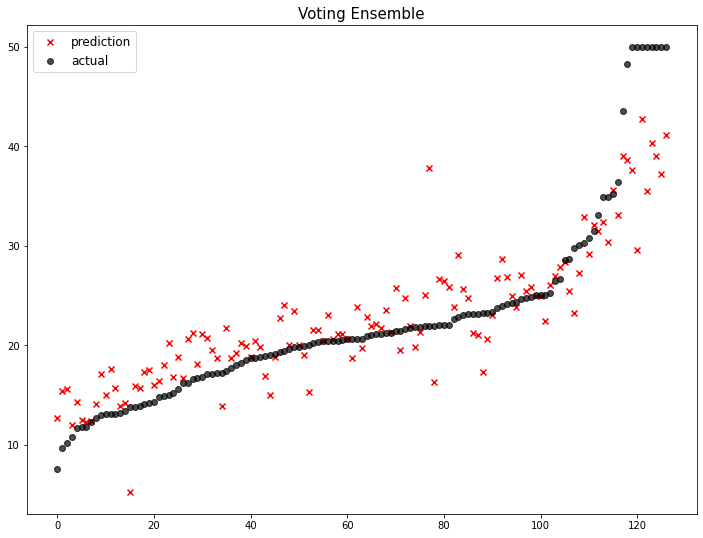

                        model        mse
0                   Lasso(10)  52.757515
1                   Ridge(-1)  50.040791
2   StandardScaler+ElasticNet  33.718148
3    ElasticNet(l1_ratio=0.2)  31.685713
4    ElasticNet(l1_ratio=0.5)  31.491853
5    ElasticNet(l1_ratio=0.8)  31.107436
6                  Lasso(0.1)  28.459592
7                   Ridge(10)  27.503376
8         Poly+Std+ElasticNet  26.832182
9                  Ridge(-10)  26.740851
10                   Ridge(1)  26.438830
11                 Ridge(0.1)  26.125895
12               Lasso(0.001)  26.117271
13              Lasso(0.0001)  26.100782
14           LinearRegression  26.098987
15                   Ridge(0)  26.098987
16                Ridge(-0.1)  26.082396
17            Voting Ensemble  20.608657
18      DecisionTreeRegressor  15.949606


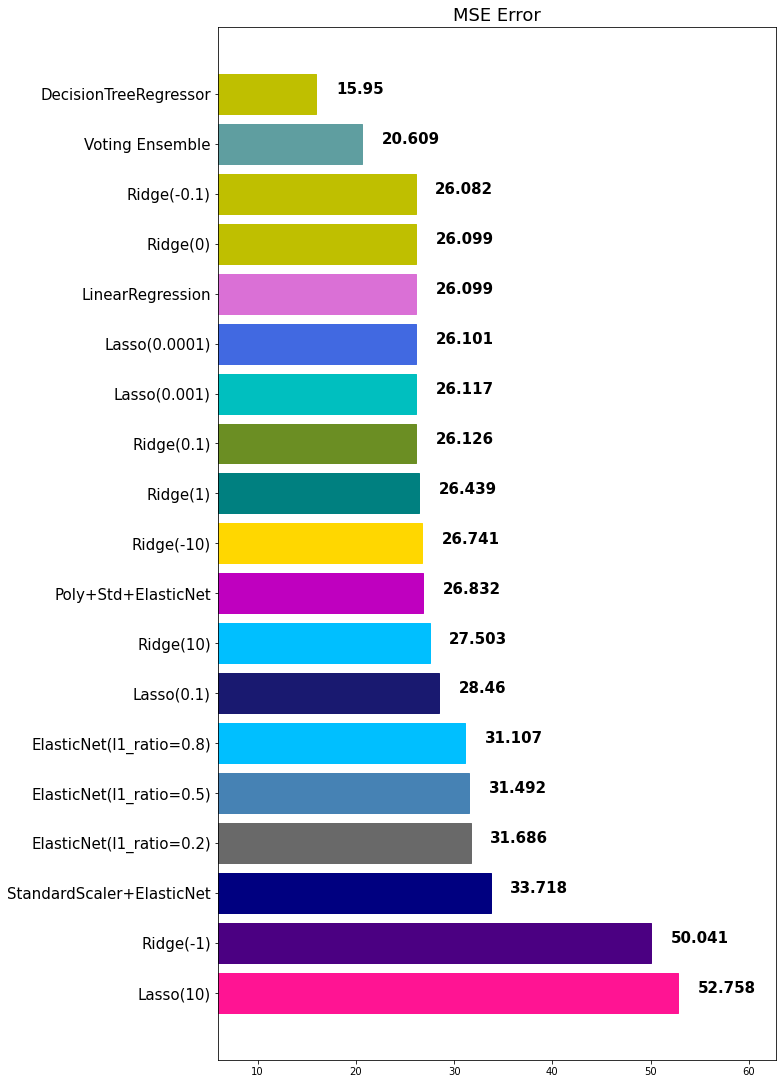

In [37]:
voting_regressor.fit(x_train, y_train)
pred = voting_regressor.predict(x_test)
mse_eval('Voting Ensemble', pred, y_test)

### voting 분류모델에서 중요한 파라미터
voting='hard/soft'

* hard : 다수결 (총 5개중 0이3개, 1이2개 -> 0으로 최종 결과)
* soft : 확률값 (0이 나올 확률이 0.4,0.5,0.6..., 1이 나올 확률이 0.1,0.2,0.3...)
    * 0 : 0.4+0.5+0.6....

In [38]:
# voting 분류 예시
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
models = [
    ('LR',LogisticRegression()),
    ('Ridge', RidgeClassifier())
]
VotingClassifier(models, voting='soft')

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('Ridge', RidgeClassifier())],
                 voting='soft')

In [39]:
# bagging
# 데이터셋을 중첩해서 샘플링하는 방식
# 데이터셋 : [1,2,3,4,5]
# A : [1,2,3]
# B : [3,4,5]
# C : [2,3,4]
# 단일 모델로 여러개의 샘플 조합
# 대표적인 배깅모델 : RandomForest

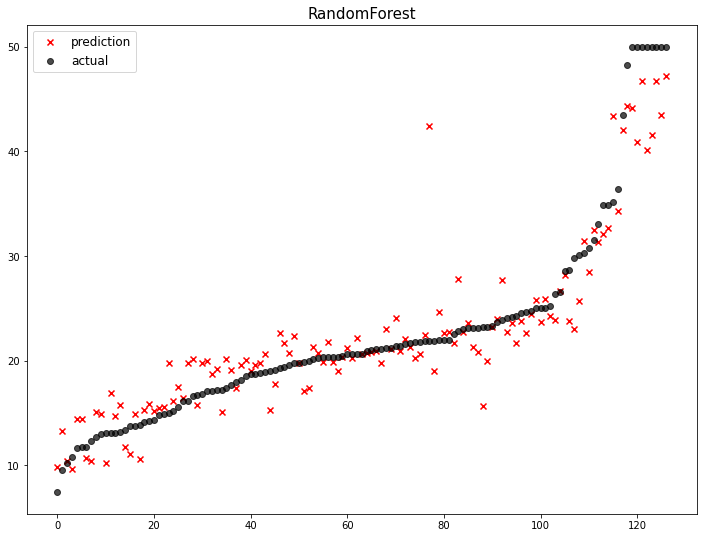

                        model        mse
0                   Lasso(10)  52.757515
1                   Ridge(-1)  50.040791
2   StandardScaler+ElasticNet  33.718148
3    ElasticNet(l1_ratio=0.2)  31.685713
4    ElasticNet(l1_ratio=0.5)  31.491853
5    ElasticNet(l1_ratio=0.8)  31.107436
6                  Lasso(0.1)  28.459592
7                   Ridge(10)  27.503376
8         Poly+Std+ElasticNet  26.832182
9                  Ridge(-10)  26.740851
10                   Ridge(1)  26.438830
11                 Ridge(0.1)  26.125895
12               Lasso(0.001)  26.117271
13              Lasso(0.0001)  26.100782
14           LinearRegression  26.098987
15                   Ridge(0)  26.098987
16                Ridge(-0.1)  26.082396
17            Voting Ensemble  20.608657
18      DecisionTreeRegressor  15.949606
19               RandomForest  11.219438


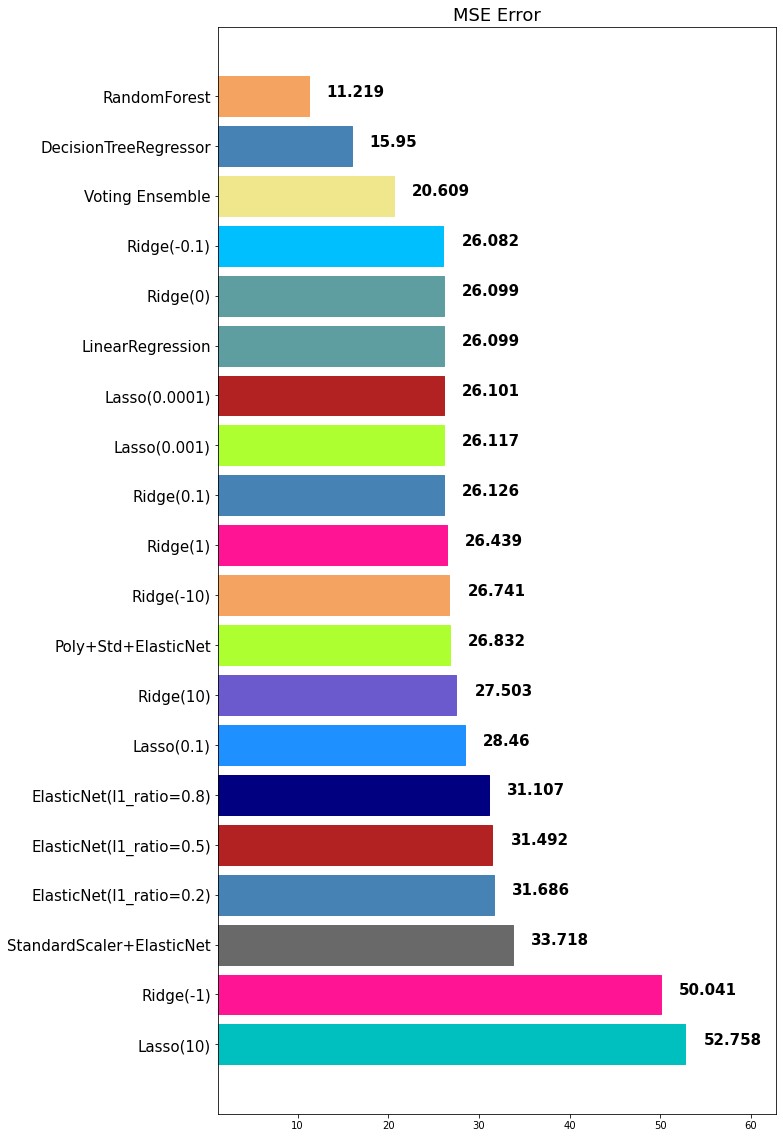

In [40]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)
mse_eval('RandomForest', pred, y_test)

#### RandomForest 하이퍼 파라미터
* random_state : 랜덤시드값
* max_depth : 최대깊이 (과적합 방지)
* n_estimators : 트리 개수
* max_features : 최대 피쳐개수
* min_sample_split :  최소샘플개수
* n_jobs : CPU(코어) 사용개수

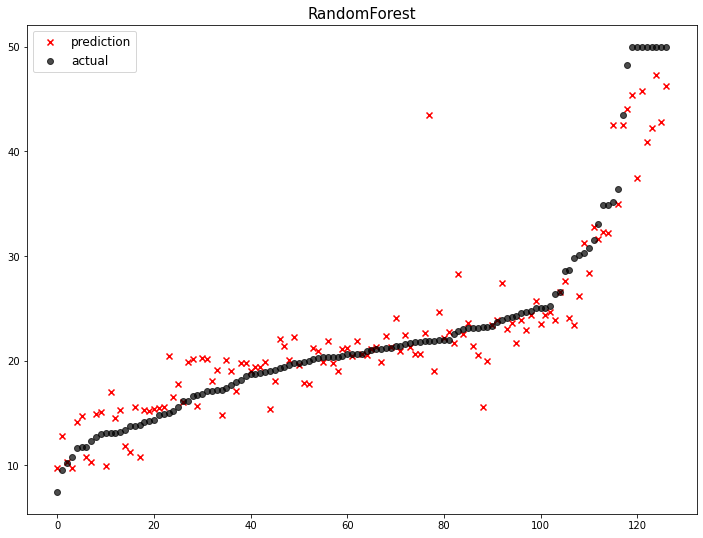

                        model        mse
0                   Lasso(10)  52.757515
1                   Ridge(-1)  50.040791
2   StandardScaler+ElasticNet  33.718148
3    ElasticNet(l1_ratio=0.2)  31.685713
4    ElasticNet(l1_ratio=0.5)  31.491853
5    ElasticNet(l1_ratio=0.8)  31.107436
6                  Lasso(0.1)  28.459592
7                   Ridge(10)  27.503376
8         Poly+Std+ElasticNet  26.832182
9                  Ridge(-10)  26.740851
10                   Ridge(1)  26.438830
11                 Ridge(0.1)  26.125895
12               Lasso(0.001)  26.117271
13              Lasso(0.0001)  26.100782
14           LinearRegression  26.098987
15                   Ridge(0)  26.098987
16                Ridge(-0.1)  26.082396
17            Voting Ensemble  20.608657
18      DecisionTreeRegressor  15.949606
19               RandomForest  11.755107


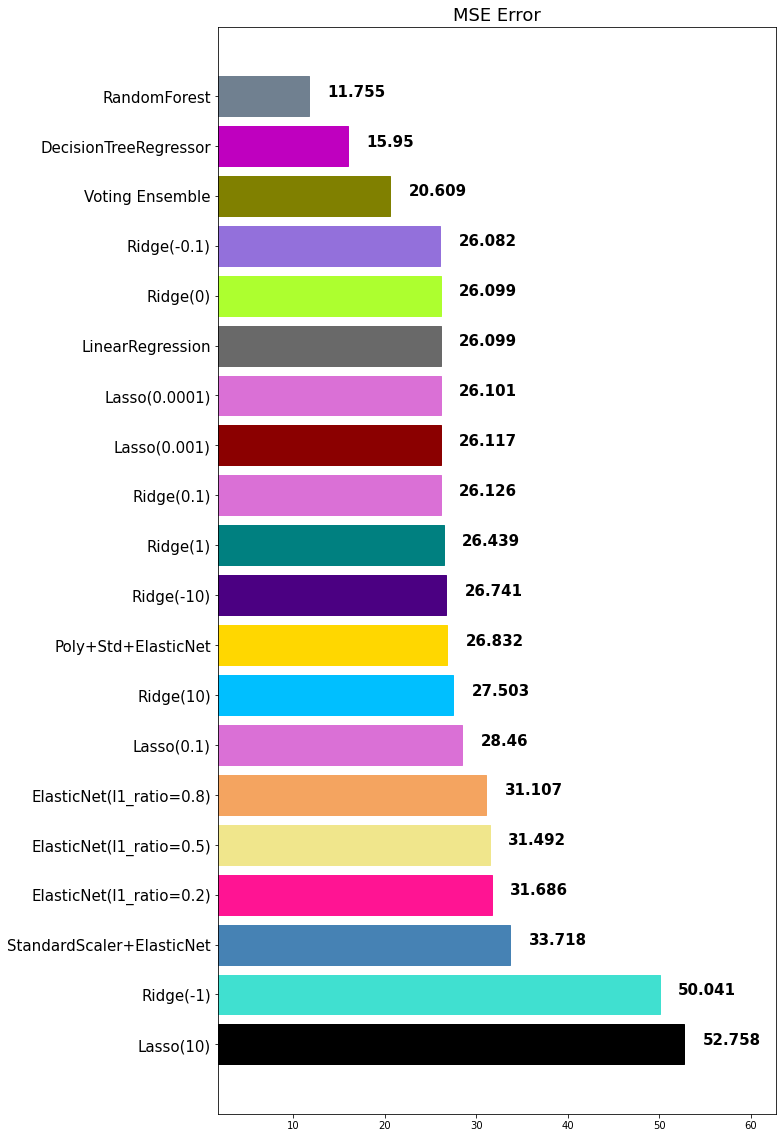

In [44]:
model = RandomForestRegressor(
    random_state=32, n_jobs=-1, 
    n_estimators=1000, max_depth=15, max_features=0.9
)
model.fit(x_train, y_train)
pred = model.predict(x_test)
mse_eval('RandomForest', pred, y_test)

### boosting
* 이전 학습한 예측값 중에 잘못 예측한 데이터에 가중치를 부여해서 보완해나가는 방식
* 장점 : 성능 우수
* 단점 : 이상치에 민감, 학습시간이 오래걸림
* 대표적인 부스팅 모델
    * AdaBoost
    * GradientBoost
    * LightGBM(LGBM)
    * XGBoost

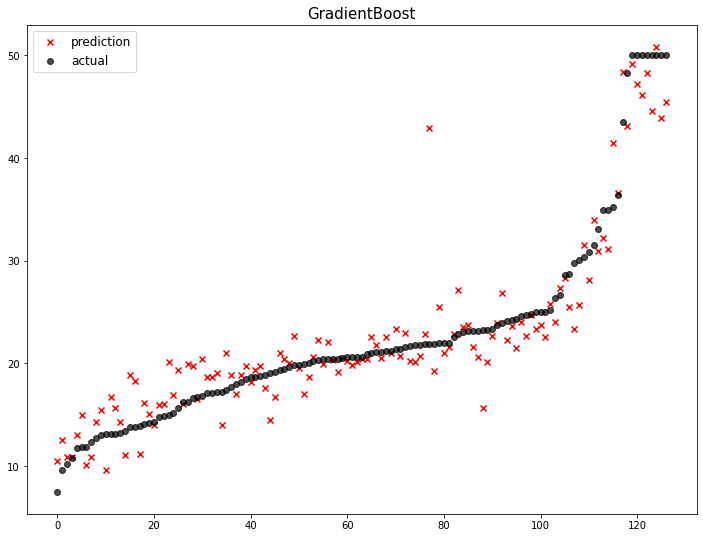

                        model        mse
0                   Lasso(10)  52.757515
1                   Ridge(-1)  50.040791
2   StandardScaler+ElasticNet  33.718148
3    ElasticNet(l1_ratio=0.2)  31.685713
4    ElasticNet(l1_ratio=0.5)  31.491853
5    ElasticNet(l1_ratio=0.8)  31.107436
6                  Lasso(0.1)  28.459592
7                   Ridge(10)  27.503376
8         Poly+Std+ElasticNet  26.832182
9                  Ridge(-10)  26.740851
10                   Ridge(1)  26.438830
11                 Ridge(0.1)  26.125895
12               Lasso(0.001)  26.117271
13              Lasso(0.0001)  26.100782
14           LinearRegression  26.098987
15                   Ridge(0)  26.098987
16                Ridge(-0.1)  26.082396
17            Voting Ensemble  20.608657
18      DecisionTreeRegressor  15.949606
19               RandomForest  11.755107
20              GradientBoost   9.895911


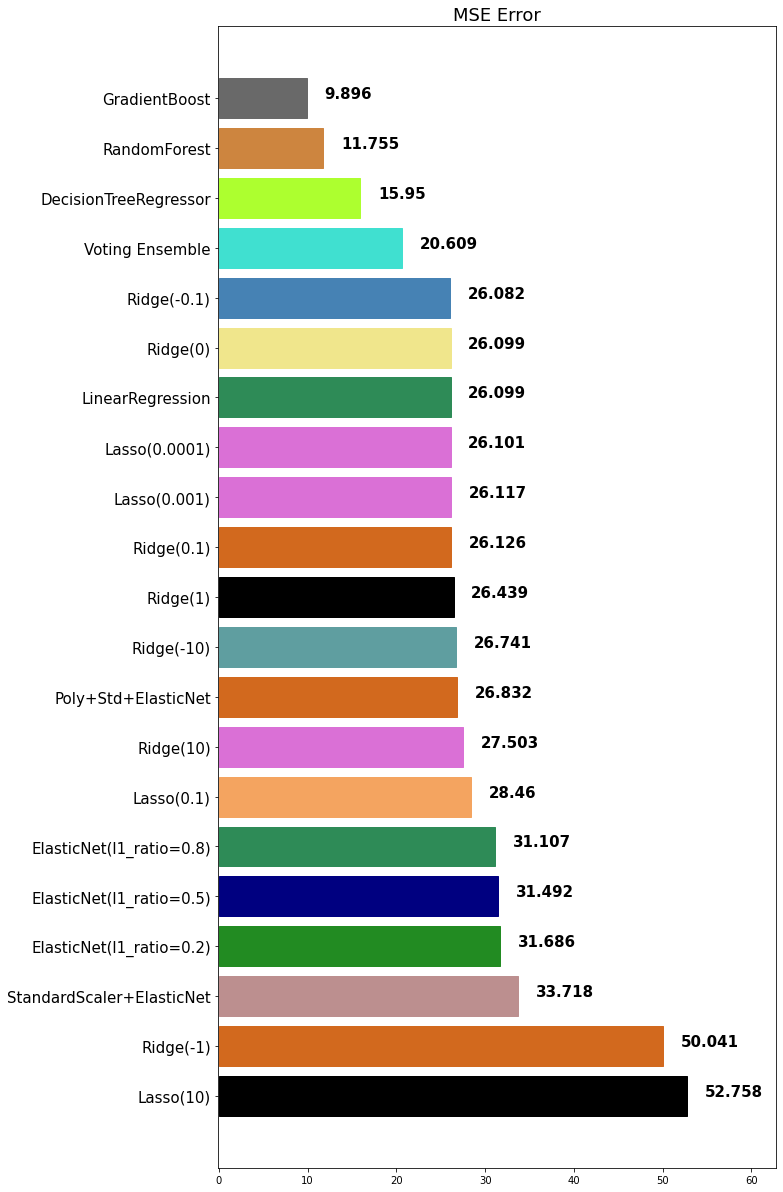

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)
mse_eval('GradientBoost', pred, y_test)

### 하이퍼 파라미터
* random_state
* n_jobs
* n_estimators : 스테이징 개수(default:100)
* subsample : 샘플비율
* learning_rate : 학습률, 너무 크면 성능이 떨어지고, 너무 작으면 학습시간이 오래걸림(default:0.1) n_estimators 같이 튜닝

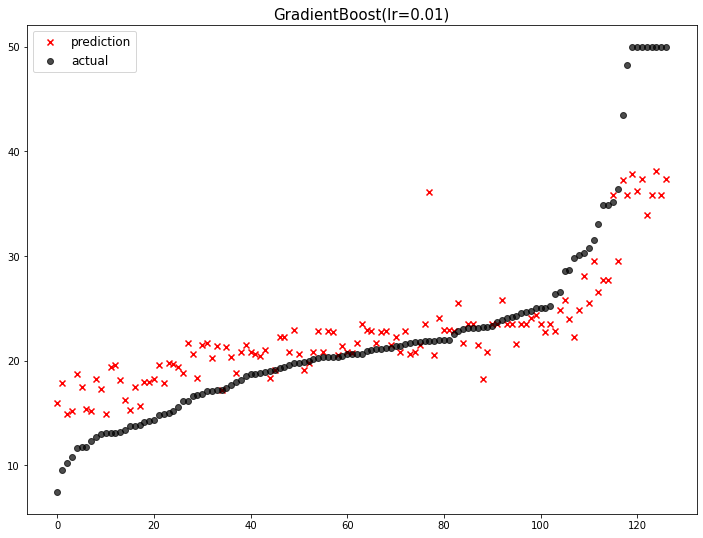

                        model        mse
0                   Lasso(10)  52.757515
1                   Ridge(-1)  50.040791
2   StandardScaler+ElasticNet  33.718148
3    ElasticNet(l1_ratio=0.2)  31.685713
4    ElasticNet(l1_ratio=0.5)  31.491853
5    ElasticNet(l1_ratio=0.8)  31.107436
6                  Lasso(0.1)  28.459592
7                   Ridge(10)  27.503376
8         Poly+Std+ElasticNet  26.832182
9                  Ridge(-10)  26.740851
10                   Ridge(1)  26.438830
11                 Ridge(0.1)  26.125895
12               Lasso(0.001)  26.117271
13              Lasso(0.0001)  26.100782
14           LinearRegression  26.098987
15                   Ridge(0)  26.098987
16                Ridge(-0.1)  26.082396
17     GradientBoost(lr=0.01)  24.883475
18            Voting Ensemble  20.608657
19      DecisionTreeRegressor  15.949606
20               RandomForest  11.755107
21              GradientBoost   9.895911


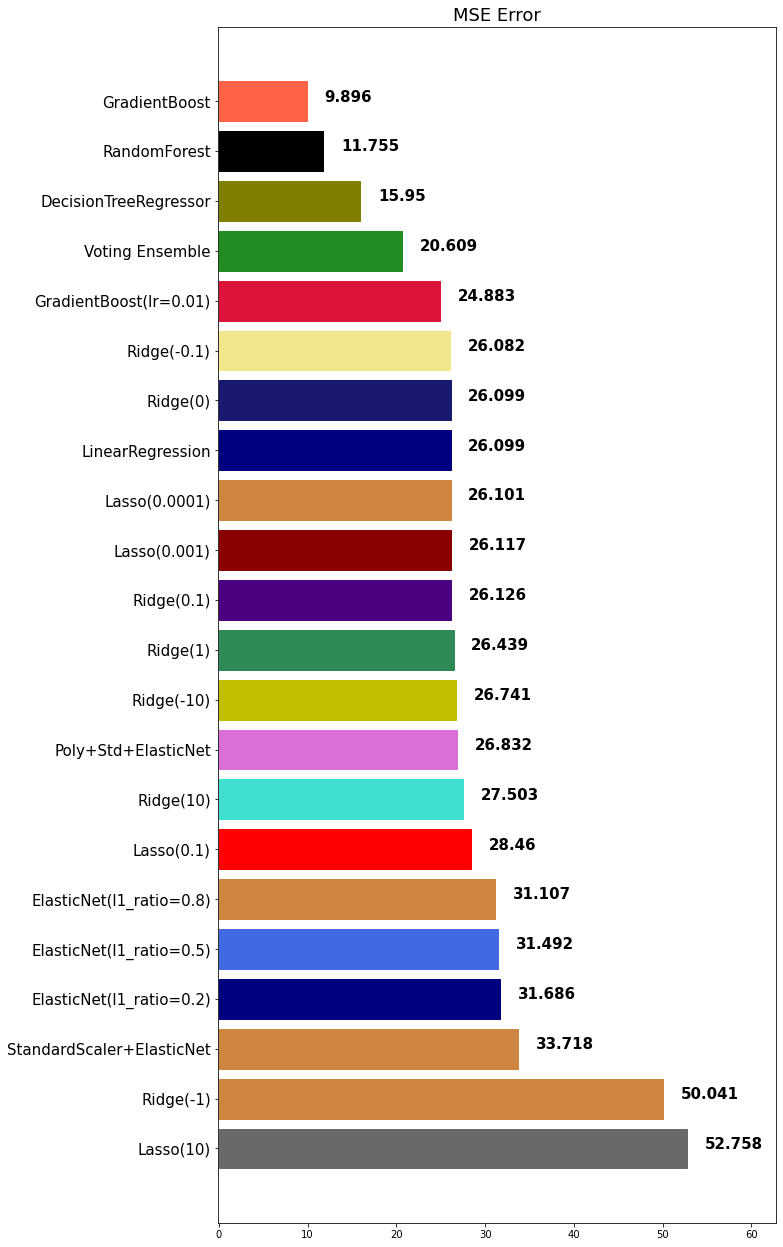

In [48]:
model = GradientBoostingRegressor(learning_rate=0.001, n_estimators=1000)
model.fit(x_train, y_train)
pred = model.predict(x_test)
mse_eval('GradientBoost(lr=0.001)', pred, y_test)

### XGBoost
* 사이킷런에 없음
* 성능 우수
* GBM보다 속도 빠르다, 성능 향상
* 학습속도 느림

In [49]:
!pip install xgboost

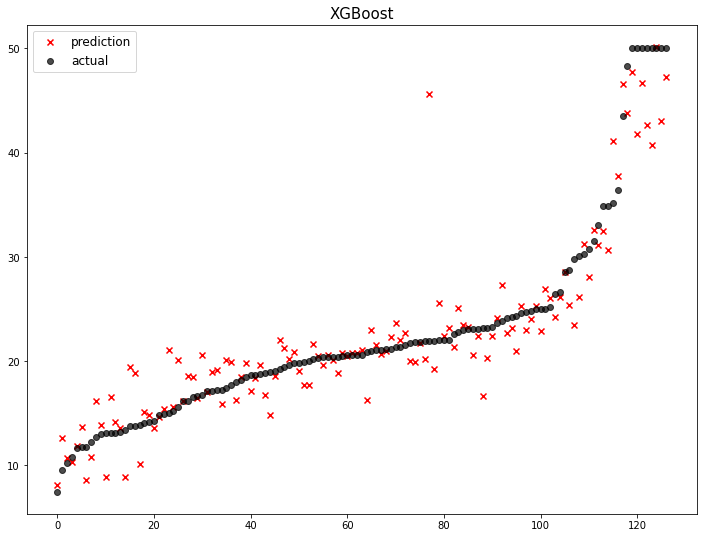

                        model        mse
0                   Lasso(10)  52.757515
1                   Ridge(-1)  50.040791
2   StandardScaler+ElasticNet  33.718148
3    ElasticNet(l1_ratio=0.2)  31.685713
4    ElasticNet(l1_ratio=0.5)  31.491853
5    ElasticNet(l1_ratio=0.8)  31.107436
6                  Lasso(0.1)  28.459592
7                   Ridge(10)  27.503376
8         Poly+Std+ElasticNet  26.832182
9                  Ridge(-10)  26.740851
10                   Ridge(1)  26.438830
11                 Ridge(0.1)  26.125895
12               Lasso(0.001)  26.117271
13              Lasso(0.0001)  26.100782
14           LinearRegression  26.098987
15                   Ridge(0)  26.098987
16                Ridge(-0.1)  26.082396
17     GradientBoost(lr=0.01)  24.883475
18            Voting Ensemble  20.608657
19      DecisionTreeRegressor  15.949606
20                    XGBoost  11.898961
21               RandomForest  11.755107
22              GradientBoost   9.895911


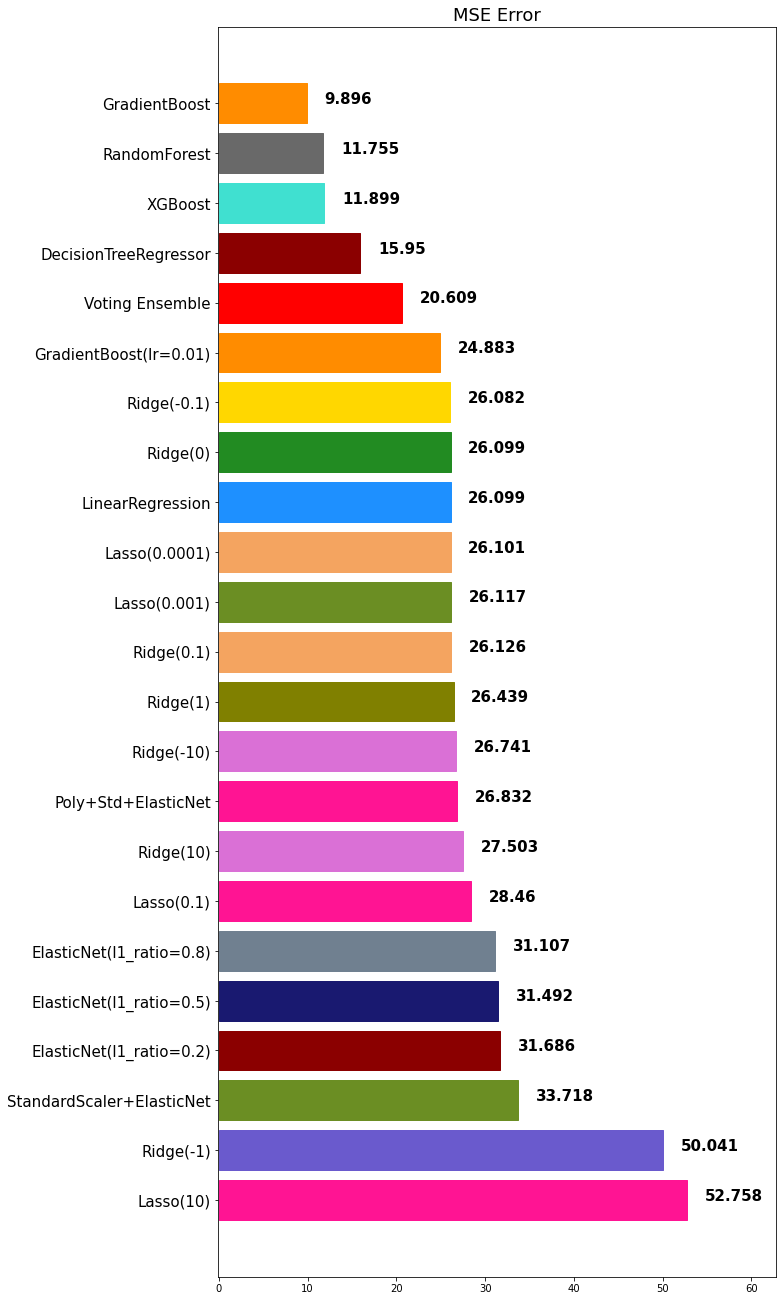

In [50]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)
mse_eval('XGBoost', pred, y_test)

[12:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




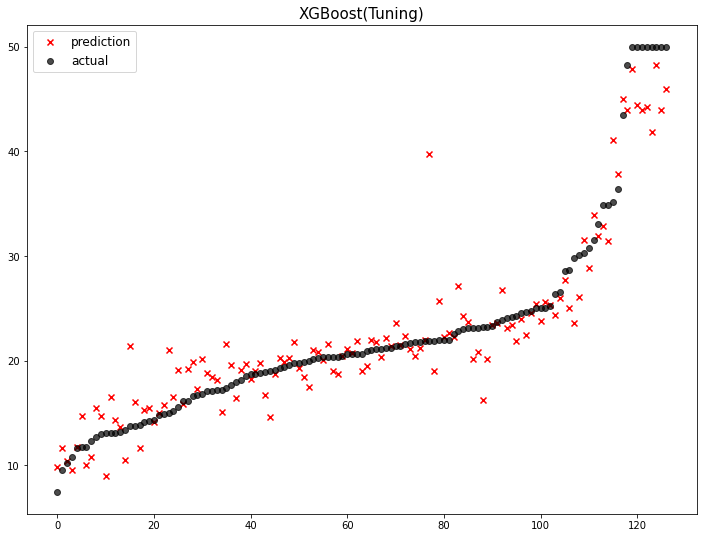

                        model        mse
0                   Lasso(10)  52.757515
1                   Ridge(-1)  50.040791
2   StandardScaler+ElasticNet  33.718148
3    ElasticNet(l1_ratio=0.2)  31.685713
4    ElasticNet(l1_ratio=0.5)  31.491853
5    ElasticNet(l1_ratio=0.8)  31.107436
6                  Lasso(0.1)  28.459592
7                   Ridge(10)  27.503376
8         Poly+Std+ElasticNet  26.832182
9                  Ridge(-10)  26.740851
10                   Ridge(1)  26.438830
11                 Ridge(0.1)  26.125895
12               Lasso(0.001)  26.117271
13              Lasso(0.0001)  26.100782
14           LinearRegression  26.098987
15                   Ridge(0)  26.098987
16                Ridge(-0.1)  26.082396
17     GradientBoost(lr=0.01)  24.883475
18            Voting Ensemble  20.608657
19      DecisionTreeRegressor  15.949606
20                    XGBoost  11.898961
21               RandomForest  11.755107
22              GradientBoost   9.895911
23            XG

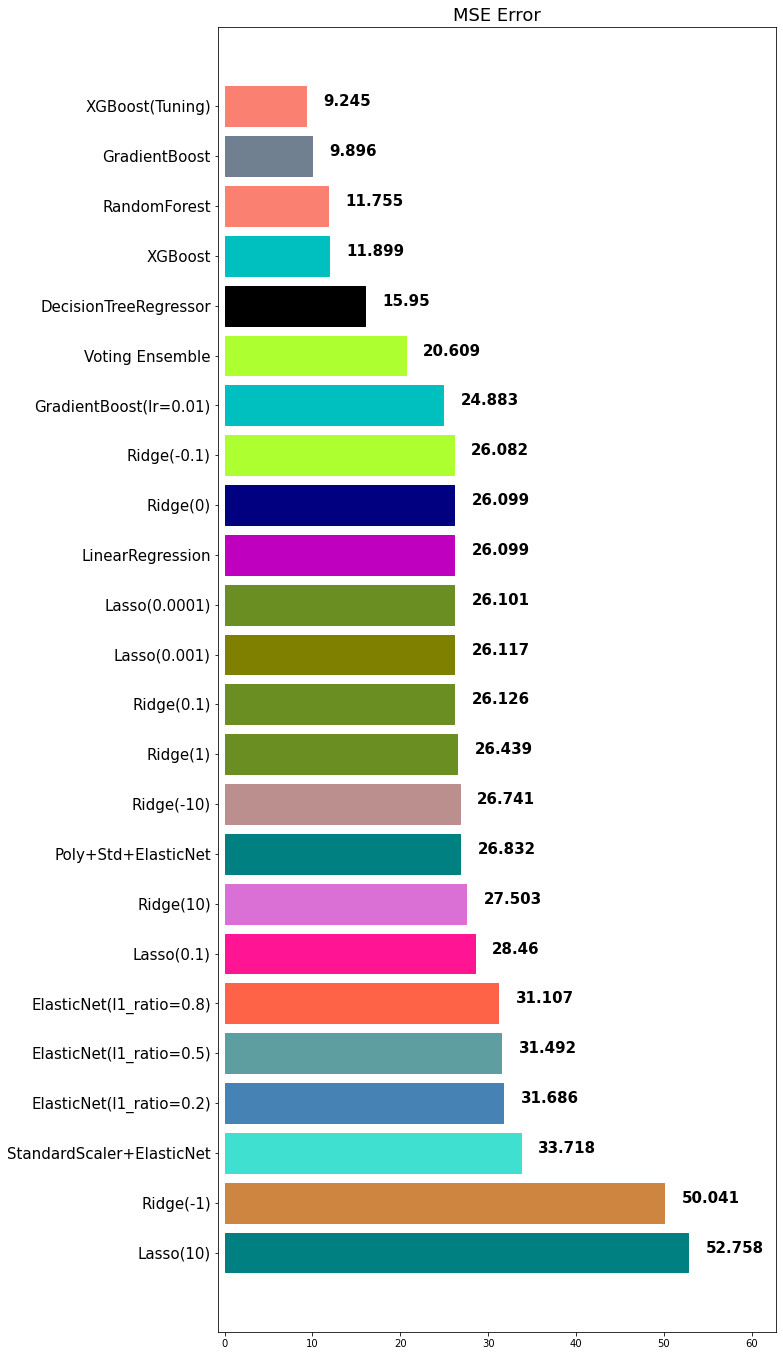

In [51]:
model = XGBRegressor(random_state=42, learning_rate=0.01,
                    n_estimators=1000, max_depth=7,
                    max_features=0.8, subsample=0.8)
model.fit(x_train, y_train)
pred = model.predict(x_test)
mse_eval('XGBoost(Tuning)', pred, y_test)

In [52]:
# LightGBM

In [1]:
!pip install lightgbm

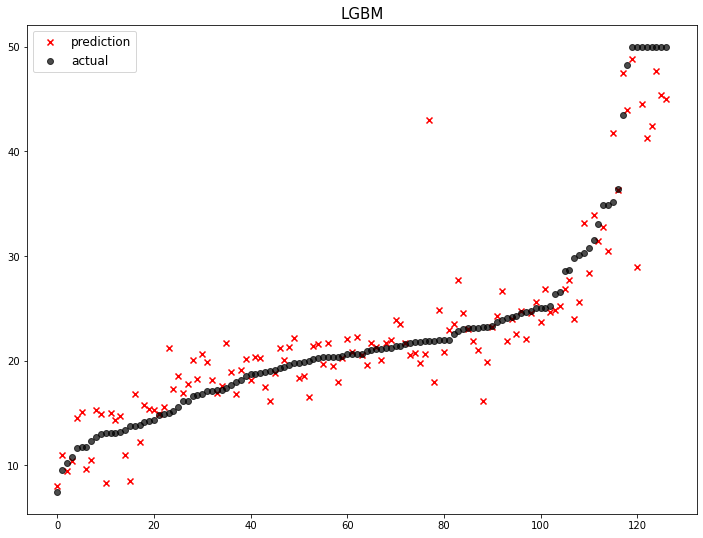

                        model        mse
0                   Lasso(10)  52.757515
1                   Ridge(-1)  50.040791
2   StandardScaler+ElasticNet  33.718148
3    ElasticNet(l1_ratio=0.2)  31.685713
4    ElasticNet(l1_ratio=0.5)  31.491853
5    ElasticNet(l1_ratio=0.8)  31.107436
6                  Lasso(0.1)  28.459592
7                   Ridge(10)  27.503376
8         Poly+Std+ElasticNet  26.832182
9                  Ridge(-10)  26.740851
10                   Ridge(1)  26.438830
11                 Ridge(0.1)  26.125895
12               Lasso(0.001)  26.117271
13              Lasso(0.0001)  26.100782
14           LinearRegression  26.098987
15                   Ridge(0)  26.098987
16                Ridge(-0.1)  26.082396
17     GradientBoost(lr=0.01)  24.883475
18            Voting Ensemble  20.608657
19      DecisionTreeRegressor  15.949606
20                       LGBM  13.890038
21                    XGBoost  11.898961
22               RandomForest  11.755107
23              

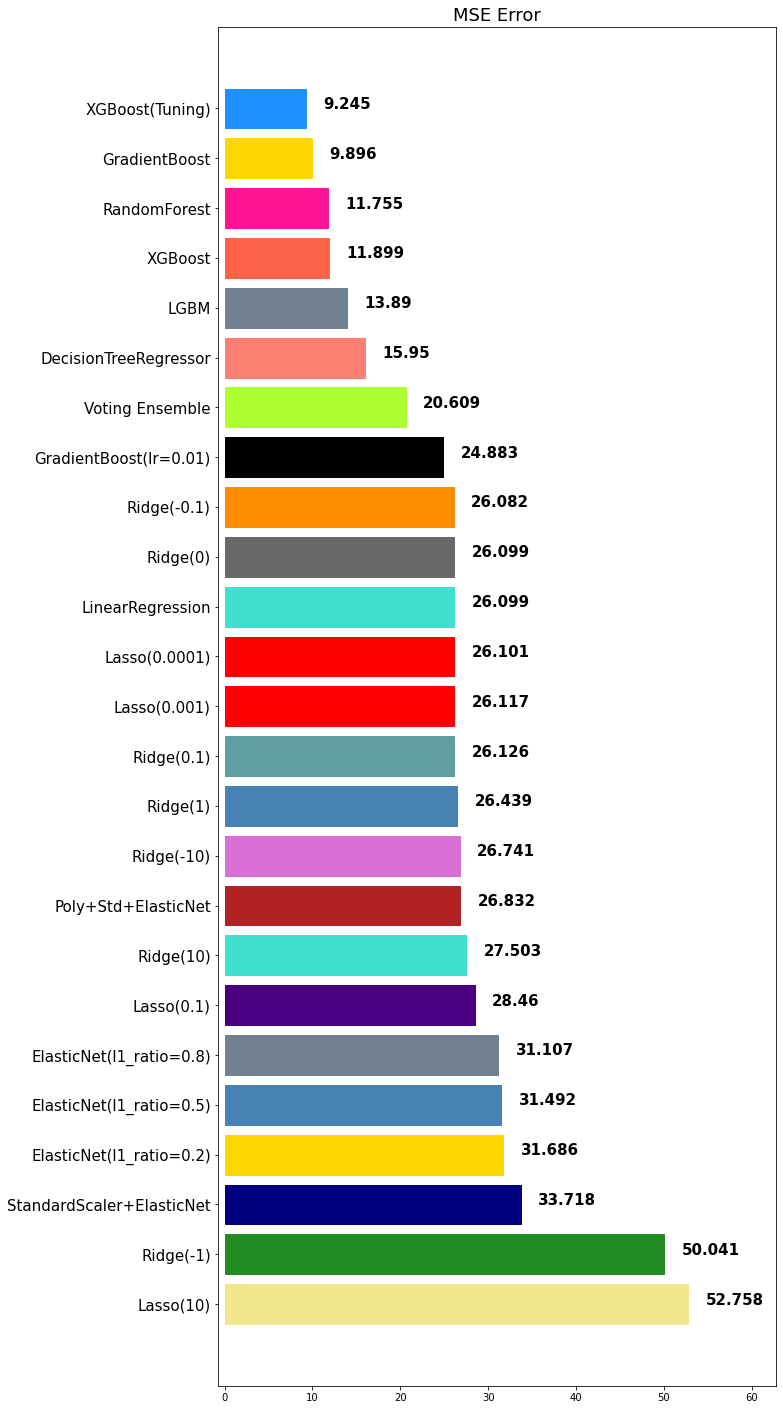

In [54]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)
mse_eval('LGBM', pred, y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


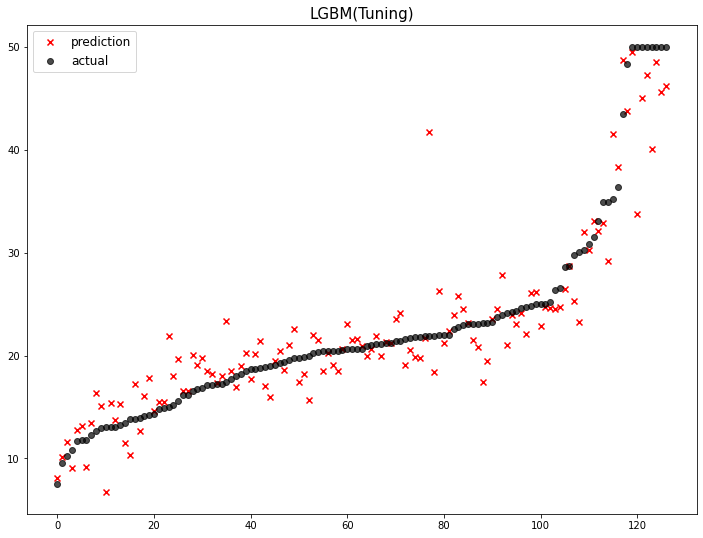

                        model        mse
0                   Lasso(10)  52.757515
1                   Ridge(-1)  50.040791
2   StandardScaler+ElasticNet  33.718148
3    ElasticNet(l1_ratio=0.2)  31.685713
4    ElasticNet(l1_ratio=0.5)  31.491853
5    ElasticNet(l1_ratio=0.8)  31.107436
6                  Lasso(0.1)  28.459592
7                   Ridge(10)  27.503376
8         Poly+Std+ElasticNet  26.832182
9                  Ridge(-10)  26.740851
10                   Ridge(1)  26.438830
11                 Ridge(0.1)  26.125895
12               Lasso(0.001)  26.117271
13              Lasso(0.0001)  26.100782
14           LinearRegression  26.098987
15                   Ridge(0)  26.098987
16                Ridge(-0.1)  26.082396
17     GradientBoost(lr=0.01)  24.883475
18            Voting Ensemble  20.608657
19      DecisionTreeRegressor  15.949606
20                       LGBM  13.890038
21               LGBM(Tuning)  12.349182
22                    XGBoost  11.898961
23              

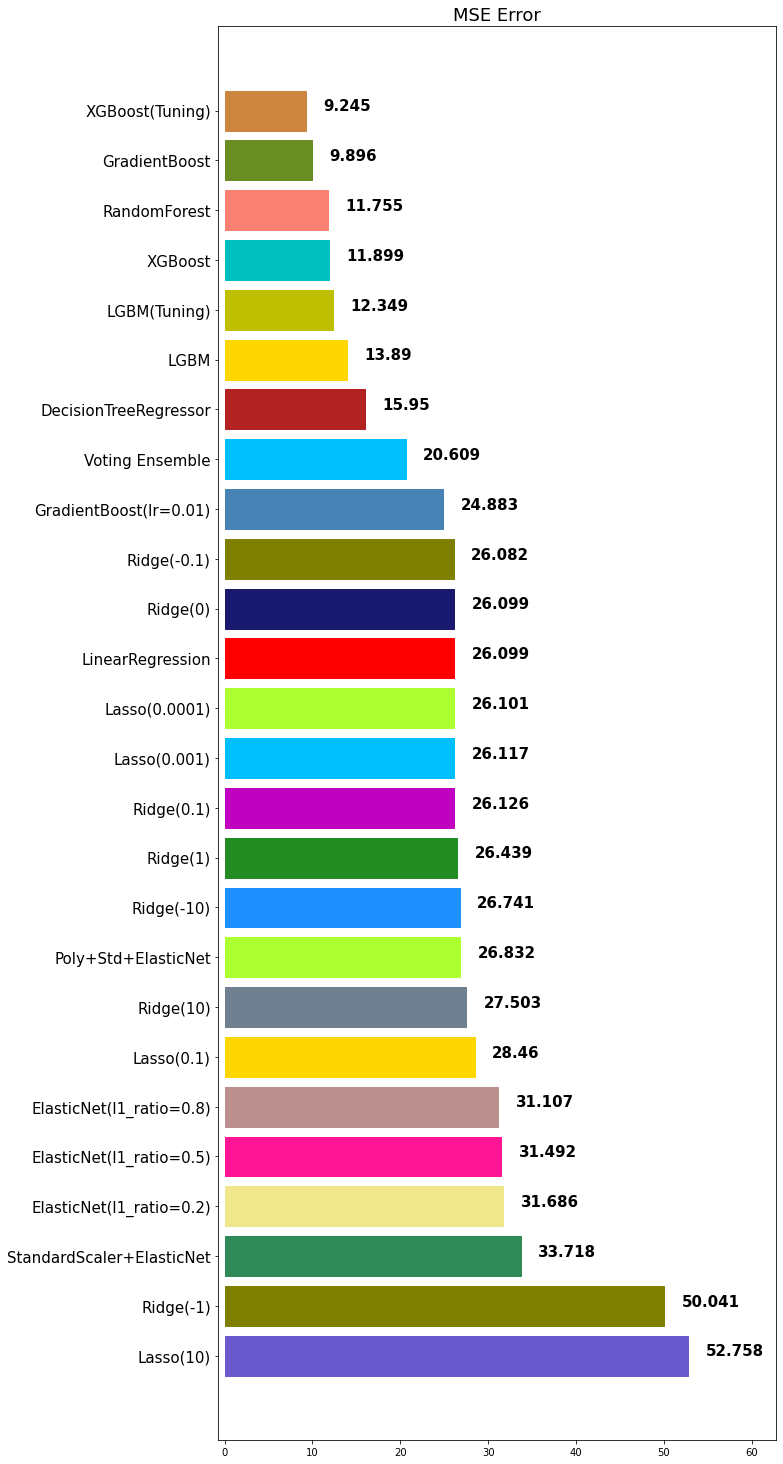

In [58]:
# colsample_bytree : 트리의 샘플사용비율
model = LGBMRegressor(random_state=42, n_estimators=2000,
                     max_depth=7, subsample=0.9, colsample_bytree=0.9)
model.fit(x_train, y_train)
pred = model.predict(x_test)
mse_eval('LGBM(Tuning)', pred, y_test)

### stacking
* 개별 모델들이 예측한 결과를 가지고 학습하여 최종 예측
* 성능을 최대로 끌어올릴 필요가 있을 때
* 과적합 가능성 높아짐

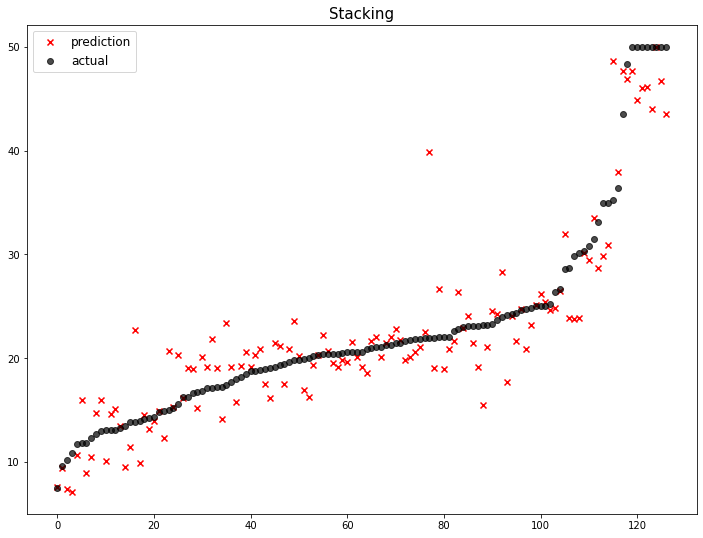

                        model        mse
0                   Lasso(10)  52.757515
1                   Ridge(-1)  50.040791
2   StandardScaler+ElasticNet  33.718148
3    ElasticNet(l1_ratio=0.2)  31.685713
4    ElasticNet(l1_ratio=0.5)  31.491853
5    ElasticNet(l1_ratio=0.8)  31.107436
6                  Lasso(0.1)  28.459592
7                   Ridge(10)  27.503376
8         Poly+Std+ElasticNet  26.832182
9                  Ridge(-10)  26.740851
10                   Ridge(1)  26.438830
11                 Ridge(0.1)  26.125895
12               Lasso(0.001)  26.117271
13              Lasso(0.0001)  26.100782
14           LinearRegression  26.098987
15                   Ridge(0)  26.098987
16                Ridge(-0.1)  26.082396
17     GradientBoost(lr=0.01)  24.883475
18            Voting Ensemble  20.608657
19      DecisionTreeRegressor  15.949606
20                       LGBM  13.890038
21               LGBM(Tuning)  12.349182
22                   Stacking  12.273038
23              

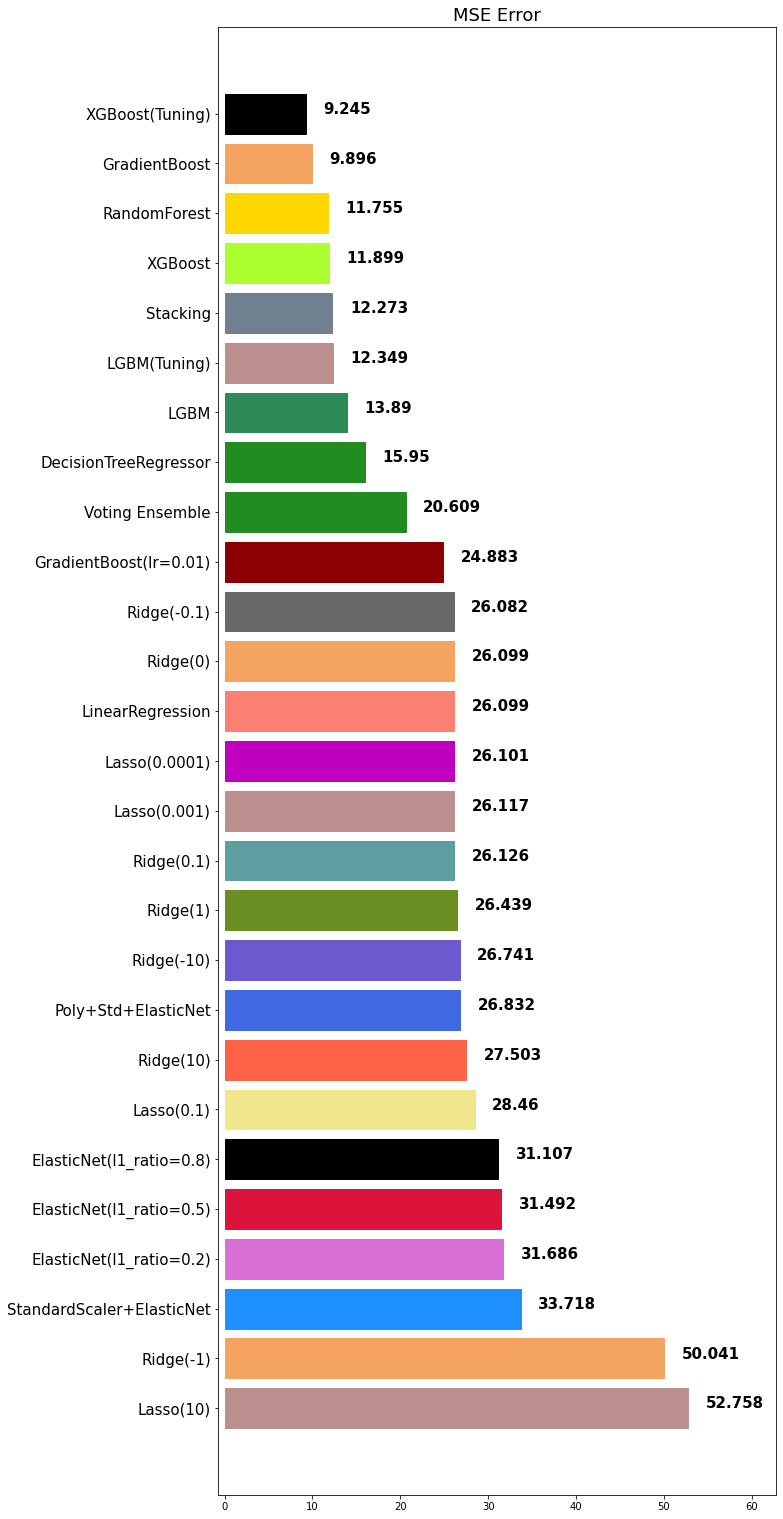

In [59]:
from sklearn.ensemble import StackingRegressor
xgb = XGBRegressor()
models = [
    ('a',XGBRegressor(random_state=42, learning_rate=0.01,
                    n_estimators=1000, max_depth=7,
                    max_features=0.8, subsample=0.8)),
    ('b',GradientBoostingRegressor()),
    ('c',RandomForestRegressor())
]
stack = StackingRegressor(models, final_estimator=xgb, n_jobs=-1)
stack.fit(x_train, y_train)
pred = stack.predict(x_test)
mse_eval('Stacking', pred, y_test)